## Introducción a Regresión Lineal
### Parte 1: Modelos Lineales Simples

Un modelo lineal simple consiste en una relación funcional entre dos variables reales $x$ y $y$ que tiene la forma:

$$y=f(x)=\beta_1x+\beta_0,$$

en donde $\beta_1$ se conoce como la **pendiente** y $\beta_0$ como el **intercepto** del modelo.

La célula siguiente permite explorar visualmente dicha relación en rangos diferentes para cada variable, y las anotaciones en la gráfica enfatizan la característica más importante de este tipo de modelos: el aumento en la variable $y$, $\Delta y$ relativo a una unidad de aumento en la varible $x$, $\Delta x$, siempre es el mismo, o bien, la derivada de $y$ respecto de $x$ siempre es constante.

In [1]:
rm(list=ls())

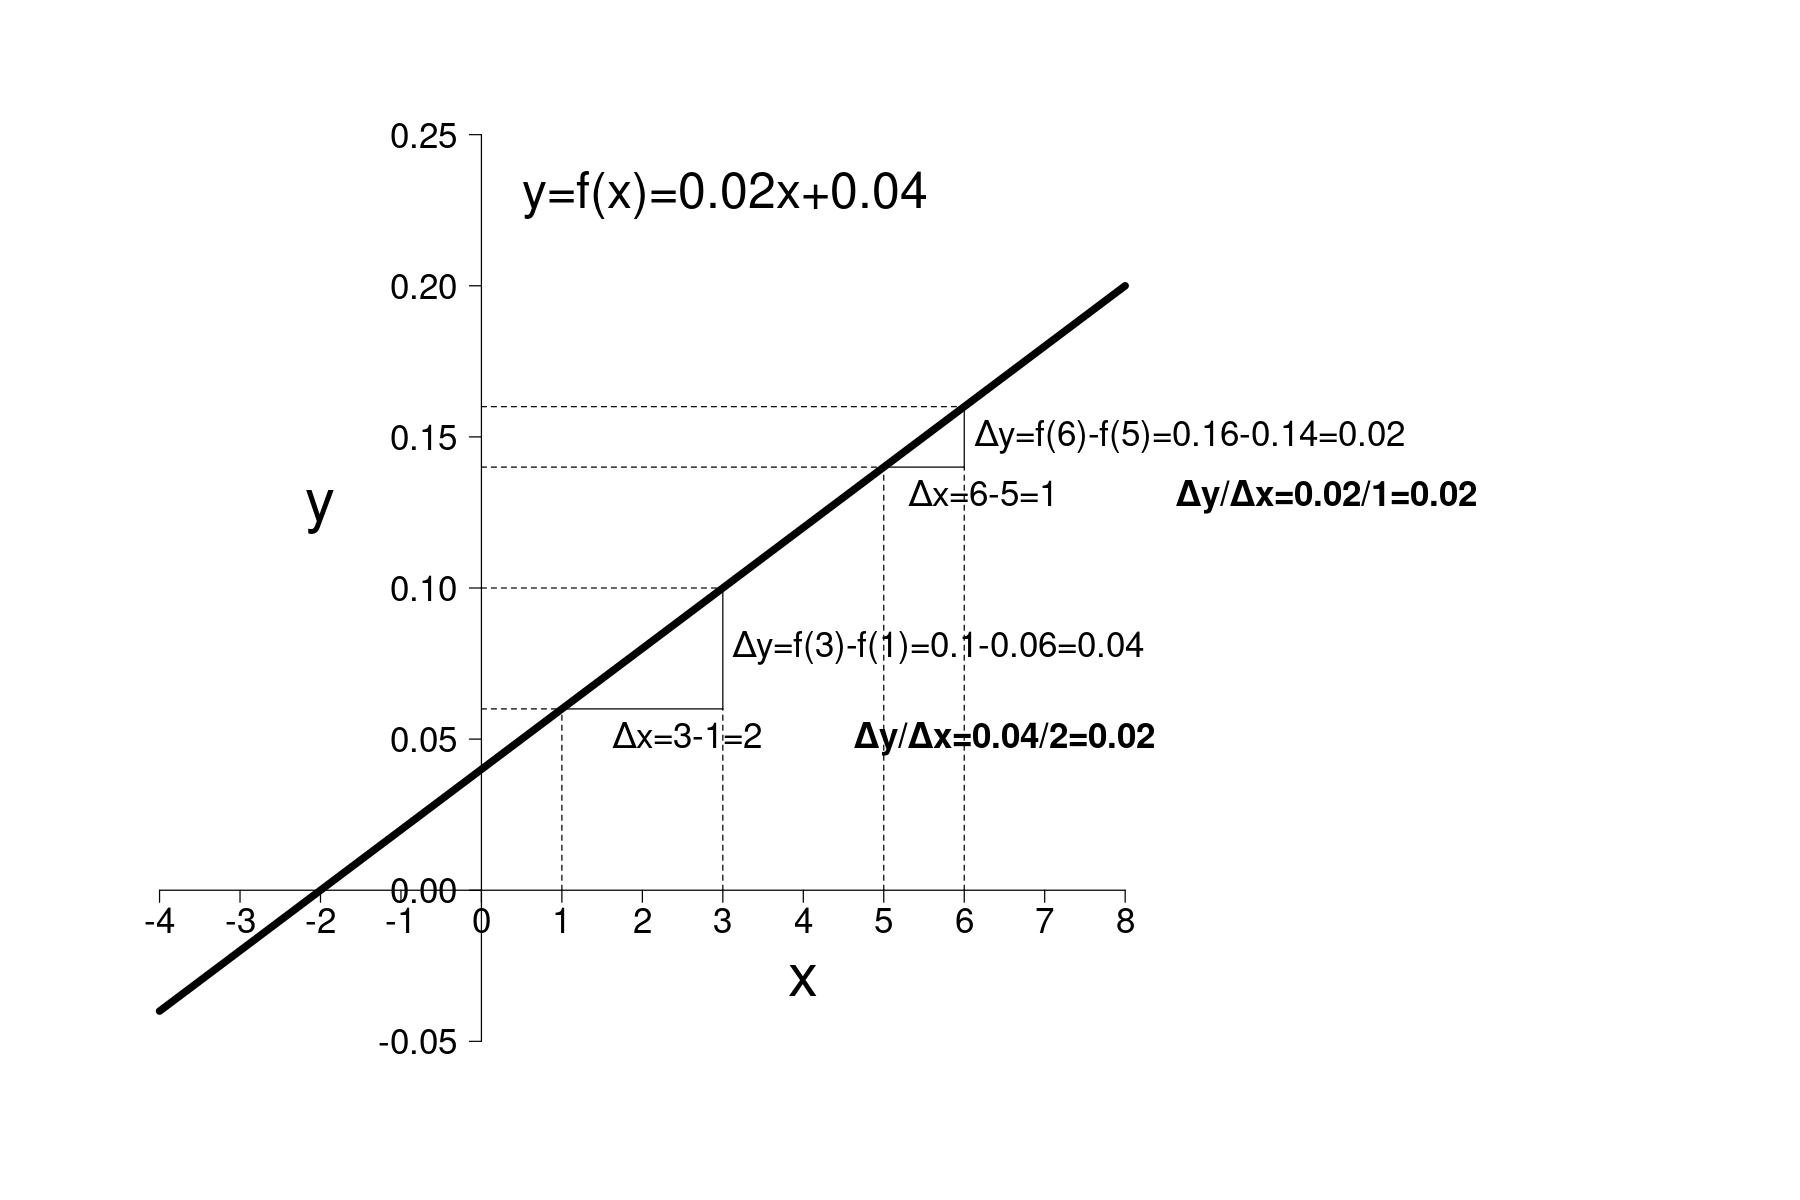

In [2]:
x <- seq(-4,8,length.out = 20)
slope <- 0.02
intercept <- 0.04
f_x <- function(x){
    return(x*slope+intercept)
}
y <- f_x(x)

options(repr.plot.width = 15, repr.plot.height = 10) # Plot size in notebook
plot(NULL,xlim=c(-4,15),ylim=c(-0.05,0.25),axes=F,ann=F)
axis(1,pos=0,cex.axis=1.75,at=-4:8)
axis(2,pos=0,las=2,cex.axis=1.75)
text(4,-0.03,'x',cex=3)
text(-2,0.125,'y',cex=3)
segments(x0=c(1,3,5,6),x1=c(3,3,6,6),
        y0=c(f_x(1),f_x(1),f_x(5),f_x(5)),
        y1=c(f_x(1),f_x(3),f_x(5),f_x(6)))
segments(x0=c(1,3,5,6),x1=c(1,3,5,6),
        y0=rep(0,4),y1=c(f_x(1),f_x(1),f_x(5),f_x(5)),
        lty='dashed')
segments(x0=rep(0,4),c(1,3,5,6),
        y0=c(f_x(1),f_x(3),f_x(5),f_x(6)),y1=c(f_x(1),f_x(3),f_x(5),f_x(6)),
         lty='dashed')
text(2,f_x(1),'\u0394x=3-1=2',cex=1.75,adj=c(0.2,1.5))
text(5,f_x(1),paste('\u0394y/\u0394x=',f_x(3)-f_x(1),'/','2=',slope,sep=''),cex=1.75,adj=c(0.1,1.5),font=2)
text(3,f_x(2),paste('\u0394y=f(3)-f(1)=',f_x(3),'-',f_x(1),'=',f_x(3)-f_x(1),sep=''),cex=1.75,adj=-0.025)
text(5.5,f_x(5),'\u0394x=6-5=1',cex=1.75,adj=c(0.1,1.5))
text(9,f_x(5),paste('\u0394y/\u0394x=',f_x(6)-f_x(5),'/','1=',slope,sep=''),cex=1.75,adj=c(0.1,1.5),font=2)
text(6,f_x(5.5),paste('\u0394y=f(6)-f(5)=',f_x(6),'-',f_x(5),'=',f_x(6)-f_x(5),sep=''),cex=1.75,adj=-0.025)
text(0.5,0.23,paste('y=f(x)=',slope,'x+',intercept,sep=''),cex=2.5,adj=0)
# Model
lines(x,y,lwd=6)

Los modelos lineales son una herramienta comúnmente empleada para intentar explicar la relación entre conjuntos de observaciones que parecen mostrar una relación sistemática (y lineal) "oculta" o "enmascarada" por ruido aleatorio. En el escenario más simple trabajamos únicamente con dos variables, $x$ y $y$, aunque estos modelos pueden extenderse para incluir varias variables independientes y dependientes al mismo tiempo.

Los supuestos centrales en la mayoría de dichos modelos probabilísticos, y en concreto del **Modelo de Regresión Lineal Simple**, son 1) que existe una relación lineal entre $x$ y **la media** de $y$, y 2) que la dispersión de las observaciones $y_i$ respecto de dicho modelo lineal puede ser descrita por una densidad Normal con dispersión constante respecto de $x$.

### Parte 2: Simulación

A continuación simulamos observaciones aleatorias desde un modelo con estas características, tanto para estudiar visualmente su comportamiento, como para mostrar cómo implementar el modelo en `JAGS` en un ejercicio de recuperación paramétrica.

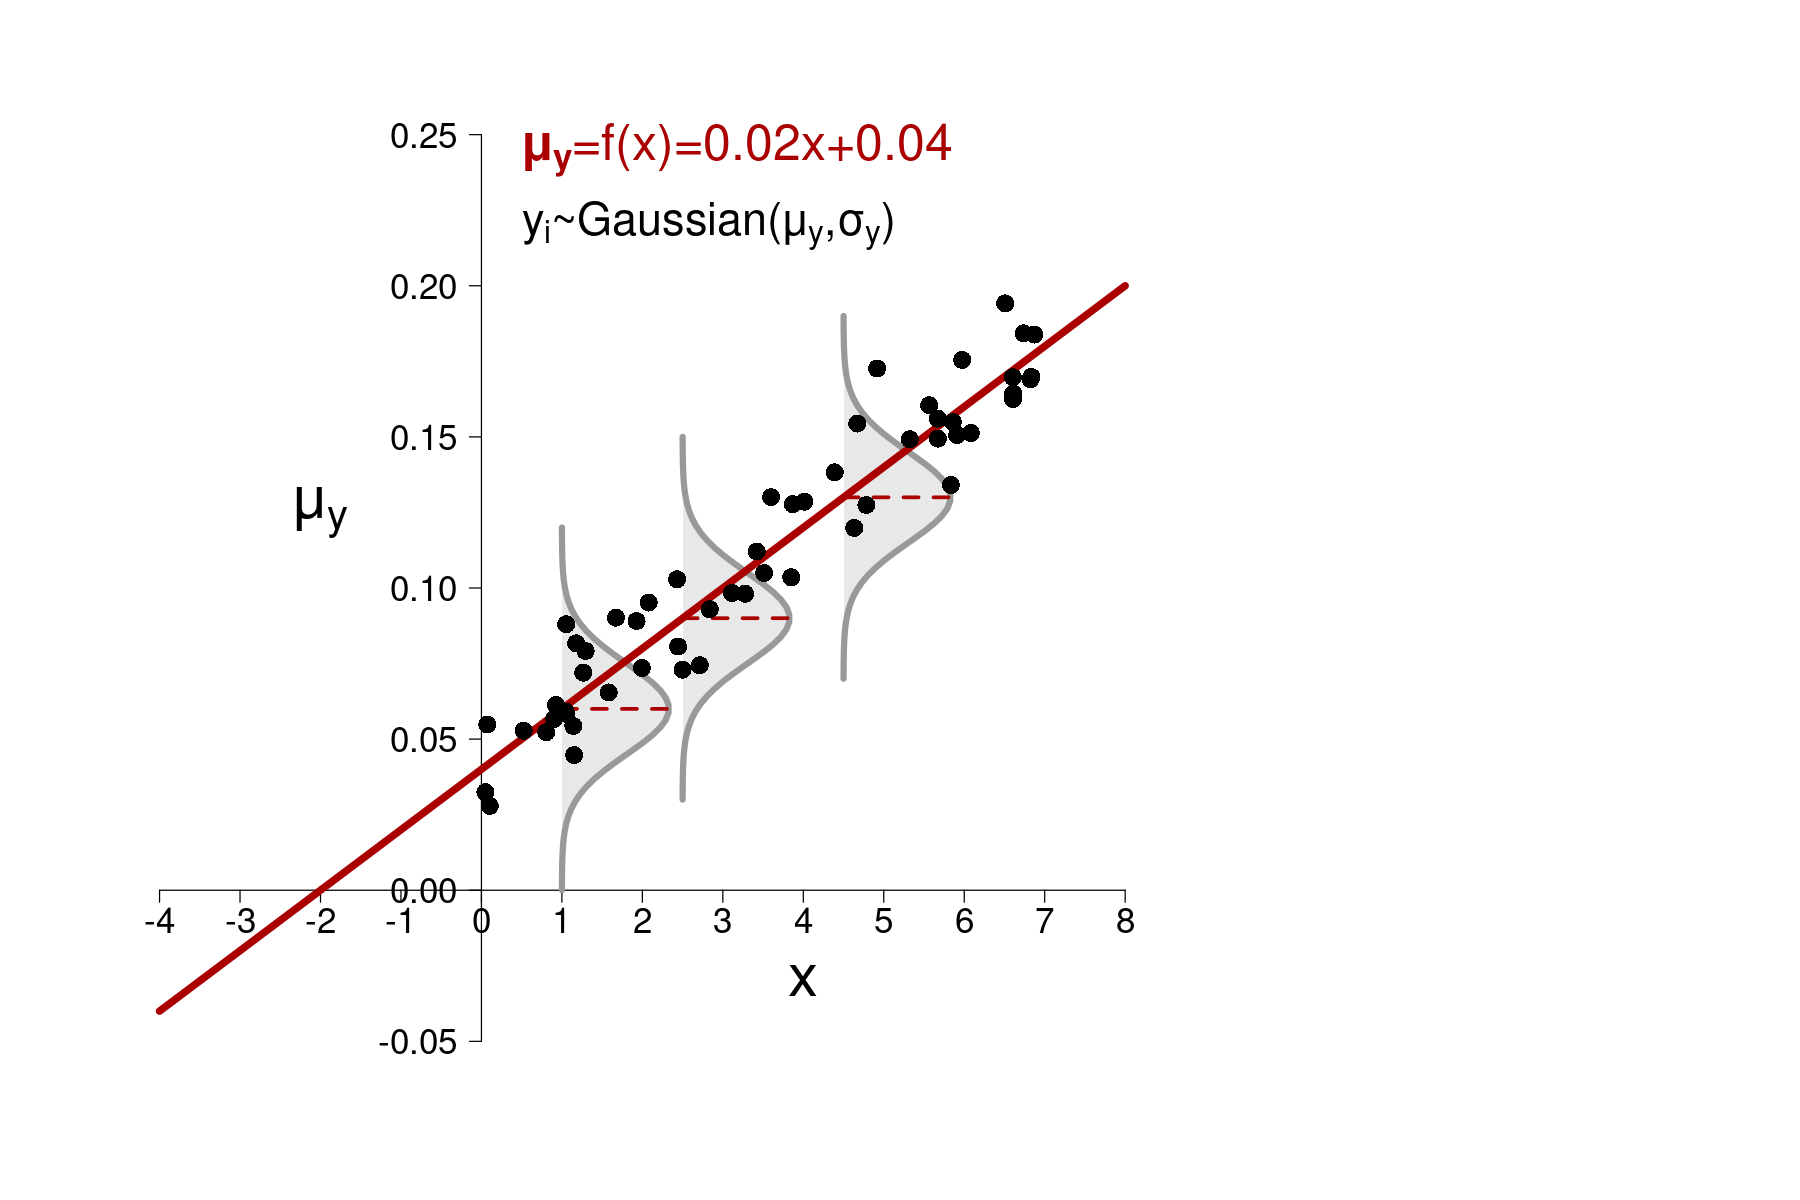

In [3]:
# Simulation
n_simul <- 55 # Number of data pairs to simulate
sd_y <- 0.015 # True STANDARD DEVIATION of Y
slope <- 0.02 # True SLOPE
intercept <- 0.04 # True INTERCEPT
f_x <- function(x){ # True relation between X and Mu_Y
    return(x*slope+intercept)
}
x <- seq(-4,8,length.out = 20)
mu_y <- f_x(x) 
set.seed(2) # Fixes 'random' replication
x_simul <- runif(n=n_simul,min = 0,max=7) # Simulating X values
y_simul <- rnorm(n=n_simul,mean=f_x(x_simul),sd=sd_y) # Simulating Y values

# Plotting
options(repr.plot.width = 15, repr.plot.height = 10) # Plot size in notebook
# Canvas
plot(NULL,xlim=c(-4,15),ylim=c(-0.05,0.25),axes=F,ann=F)
# Add axes and axes labels
axis(1,pos=0,cex.axis=1.75,at=-4:8)
axis(2,pos=0,las=2,cex.axis=1.75)
text(4,-0.03,'x',cex=3)
text(-2,0.125,expression('\u03bc'[y]),cex=3)
# Add normal curves
for(x_i in c(1,2.5,4.5)){
    y_range <- f_x(x_i)+c(-0.06,0.06)
    y_plot <- seq(y_range[1],y_range[2],length.out = 50)
    y_dens <- dnorm(y_plot,mean=f_x(x_i),sd=sd_y)*0.05+x_i
    polygon(x = c(head(y_dens,1),y_dens,tail(y_dens,1)),
           y=c(x_i,y_plot,x_i),
           col='#cccccc74',border=NA)
    lines(y_dens,y_plot,lwd=5,col='#999999')
    lines(x=c(x_i,x_i+dnorm(f_x(x_i),mean=f_x(x_i),sd=sd_y)*0.05),
         y=rep(f_x(x_i),2),lwd=3,lty='dashed',col='#aa0000')
}
# Add model line
lines(x,mu_y,lwd=6,col='#aa0000')
# Add simulated data
points(x_simul,y_simul,pch=16,cex=2)
# Add model equations
text(0.5,0.245,bquote(paste(bold('\u03BC'[y]),'=f(x)=',.(slope),'x+',.(intercept))),cex=2.5,adj=0,col='#aa0000')
text(0.5,0.22,bquote(paste('y'['i'],'~Gaussian(','\u03BC'[y],',\u03c3'[y],')')),cex=2.25,adj=0)


### Parte 3: Inferencia y Recuperación de Parámetros

En las células siguientes implementamos el modelo en `JAGS` y graficamos los resultados del algortimo. Noten que lo único a lo que `JAGS` tiene acceso son los pares de observaciones $(x_i,y_i)$, pero no conoce los valores verdaderos de la **pendiente**, ni del **intercepto**, ni de la **dispersión** de $y_i$ que generaron las observaciones. En cambio, el algoritmo sólo conoce cierta incertidumbre inicial sobre dichos parámetros, que haremos explícita en el ejemplo siguiente:

$$\beta_1\sim Gaussian(\mu=0, \sigma=1/\sqrt{1000})$$ 

$$\beta_0\sim Uniform(0, 0.15)$$ 

$$\sigma_y\sim Uniform(0, 0.20)$$

$$\mu_{y_{i}}|\beta_1, \beta_0,x_i\leftarrow \beta_1 x_i+\beta_0$$

$$y_{i}|\mu_{y{i}}, \sigma_y\sim Gaussian(\mu_{y_{i}}, \sigma_y),$$

en donde $y_i$ y $x_i$ son las únicas variables observadas.

In [4]:
# Model
write('model{

slope_post~dnorm(0,1000) # T(,0.01) # Remember Gaussian dispersion scales PRECISION
slope_prior~dnorm(0,1000) # T(,0.01) # Awas con las restricciones de valores
intercept_post~dunif(0,0.15)
intercept_prior~dunif(0,0.15)
sd_y_post~dunif(0,0.20)
sd_y_prior~dunif(0,0.20)
tau_y_post <- 1/sd_y_post^2
tau_y_prior <- 1/sd_y_prior^2
for(i in 1:n_obs){
    mu_y_post[i] <- x_simul[i]*slope_post+intercept_post
    mu_y_prior[i] <- x_simul[i]*slope_prior+intercept_prior
    y_simul[i]~dnorm(mu_y_post[i],tau_y_post)
    y_pred_post[i]~dnorm(mu_y_post[i],tau_y_post)
    y_pred_prior[i]~dnorm(mu_y_prior[i],tau_y_prior)
}

}','simple_linear_regression.bug')

# Observed
n_obs <- length(x_simul)
data_jags <- list('x_simul','y_simul','n_obs') # 'x_simul' and 'y_simul' were "filled" in previous cell

# Unobserved
unobs <- c('slope_post','slope_prior',
          'intercept_post','intercept_prior',
          'sd_y_post','sd_y_prior',
          'mu_y_post','mu_y_prior',
          'y_pred_post','y_pred_prior')

# Inference
library('R2jags')
bayes <- jags(data=data_jags,
             parameters.to.save=unobs,
             model.file='simple_linear_regression.bug',
             n.iter=30000,
             n.burnin=6000,
             n.thin=3)
nds <- bayes$BUGSoutput$sims.list

Loading required package: rjags

Loading required package: coda

Linked to JAGS 4.3.0

Loaded modules: basemod,bugs


Attaching package: ‘R2jags’


The following object is masked from ‘package:coda’:

    traceplot


module glm loaded



Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 55
   Unobserved stochastic nodes: 116
   Total graph size: 457

Initializing model



In [5]:
# Examine 'bayes': emphasize the number of unobserved against the number of observed.
#bayes
bayes$BUGSoutput$summary

,mean,sd,2.5%,25%,50%,75%,97.5%,Rhat,n.eff
deviance,-323.36923012,2.551264452,-3.262840e+02,-325.24774749,-324.02676952,-322.20607515,-316.78820938,1.000975,24000
intercept_post,0.04149470,0.003313158,3.496022e-02,0.03927273,0.04148257,0.04372317,0.04797586,1.000977,24000
intercept_prior,0.07497593,0.043423923,3.724532e-03,0.03732636,0.07498942,0.11298523,0.14628130,1.001186,8000
mu_y_post[1],0.06724599,0.002493742,6.231289e-02,0.06558824,0.06723344,0.06890671,0.07214523,1.000985,24000
mu_y_post[2],0.13932474,0.002090395,1.352504e-01,0.13792036,0.13932470,0.14072230,0.14346131,1.000943,24000
mu_y_post[3],0.12135036,0.001802507,1.177900e-01,0.12013966,0.12135135,0.12255801,0.12492279,1.000957,24000
mu_y_post[4],0.06490178,0.002561768,5.982558e-02,0.06319574,0.06489266,0.06660020,0.06993021,1.000984,24000
mu_y_post[5],0.17295720,0.003047936,1.670251e-01,0.17089436,0.17295606,0.17501157,0.17887306,1.000936,24000
mu_y_post[6],0.17290645,0.003046263,1.669770e-01,0.17084457,0.17290593,0.17495920,0.17881793,1.000936,24000
mu_y_post[7],0.05948458,0.002725027,5.408277e-02,0.05766857,0.05947427,0.06129753,0.06480216,1.000983,24000


### Plotting Model Results

#### Posterior Predictive

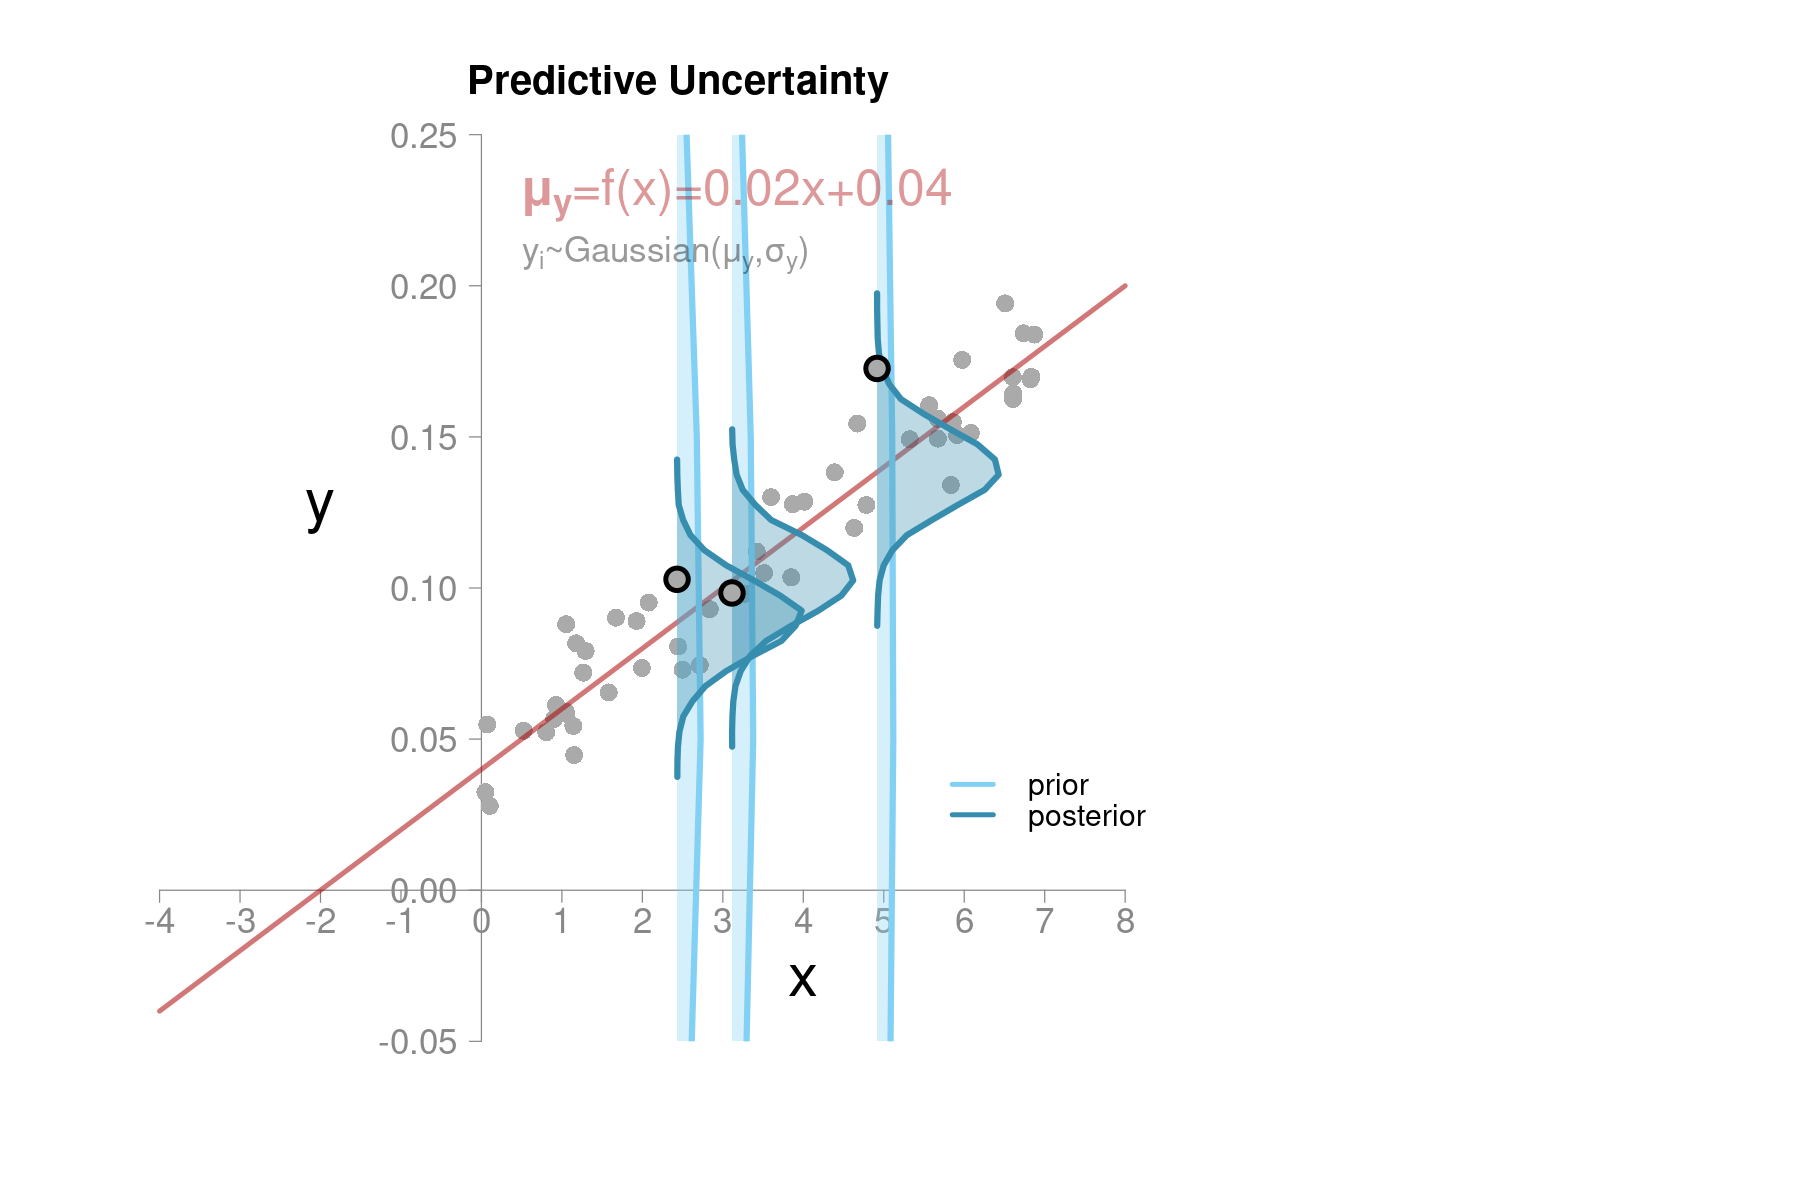

In [6]:
# POSTERIOR PREDICTIVE (pt.1)

# Colors (to be used in all graphs)
col_prior <- '#82d1f4' 
col_post <- '#378dae'
col_axis <- '#710c9e'

# Canvas
options(repr.plot.width = 15, repr.plot.height = 10) # Plot size in notebook
plot(NULL,xlim=c(-4,15),ylim=c(-0.05,0.25),axes=F,ann=F)
axis(1,pos=0,cex.axis=1.75,at=-4:8,col='#888888',col.axis='#888888')
axis(2,pos=0,las=2,cex.axis=1.75,col='#888888',col.axis='#888888')
text(4,-0.03,'x',cex=3)
text(-2,0.125,'y',cex=3)

# Data
points(x_simul,y_simul,pch=16,cex=2,col='#AAAAAA')
lines(x,y,lwd=4,col='#aa000088')

# Selected observations
index <- c(2,19,25)
#index <- 1:length(x_simul)
clip(-10,10,-.05,.25)
for(i in index){
    # Extracting data from JAGS
    ht_y_pred_prior <- hist(nds$y_pred_prior[,i],plot=F)
    ht_y_pred_post <- hist(nds$y_pred_post[,i],plot=F)
    # Rescaling and positioning with respect to X
    y_plot_post <- ht_y_pred_post$mids
    y_dens_post <- ht_y_pred_post$density*0.05+x_simul[i]
    y_plot_prior <- ht_y_pred_prior$mids
    y_dens_prior <- ht_y_pred_prior$density*0.1+x_simul[i]
    # Plotting Prior over Mu_Y[i]
    polygon(x = c(head(y_dens_prior,1),y_dens_prior,tail(y_dens_prior,1)),
           y=c(x_simul[i],y_plot_prior,x_simul[i]),
           col=paste(col_prior,'55',sep=''),border=NA)
    lines(y_dens_prior,y_plot_prior,lwd=5,col=col_prior)
    # Plotting Posterior over Mu_Y[i]
    polygon(x = c(head(y_dens_post,1),y_dens_post,tail(y_dens_post,1)),
           y=c(x_simul[i],y_plot_post,x_simul[i]),
           col=paste(col_post,'55',sep=''),border=NA)
    lines(y_dens_post,y_plot_post,lwd=5,col=col_post)
}
# Add corresponding simulated observations
points(x_simul[index],y_simul[index],lwd=4,cex=2.5,pch=21,bg='#aaaaaa')

# Model
text(0.5,0.23,bquote(paste(bold('\u03BC'[y]),'=f(x)=',.(slope),'x+',.(intercept))),cex=2.5,adj=0,col='#aa000066')
text(0.5,0.21,bquote(paste('y'['i'],'~Gaussian(','\u03BC'[y],',\u03c3'[y],')')),cex=1.75,adj=0,col='#00000066')

# Legend
legend(5,0.03,yjust=0.5,
      legend=c('prior','posterior'),
      col=c(col_prior,col_post),
       seg.len=0.6,
       cex=1.5,
       x.intersp=0.5,
       y.intersp=0.5,
       box.lty='blank',
       bg=NA,
      lwd=4)

# Main title
mtext('Predictive Uncertainty',3,cex=2,adj=0.3,font=2)

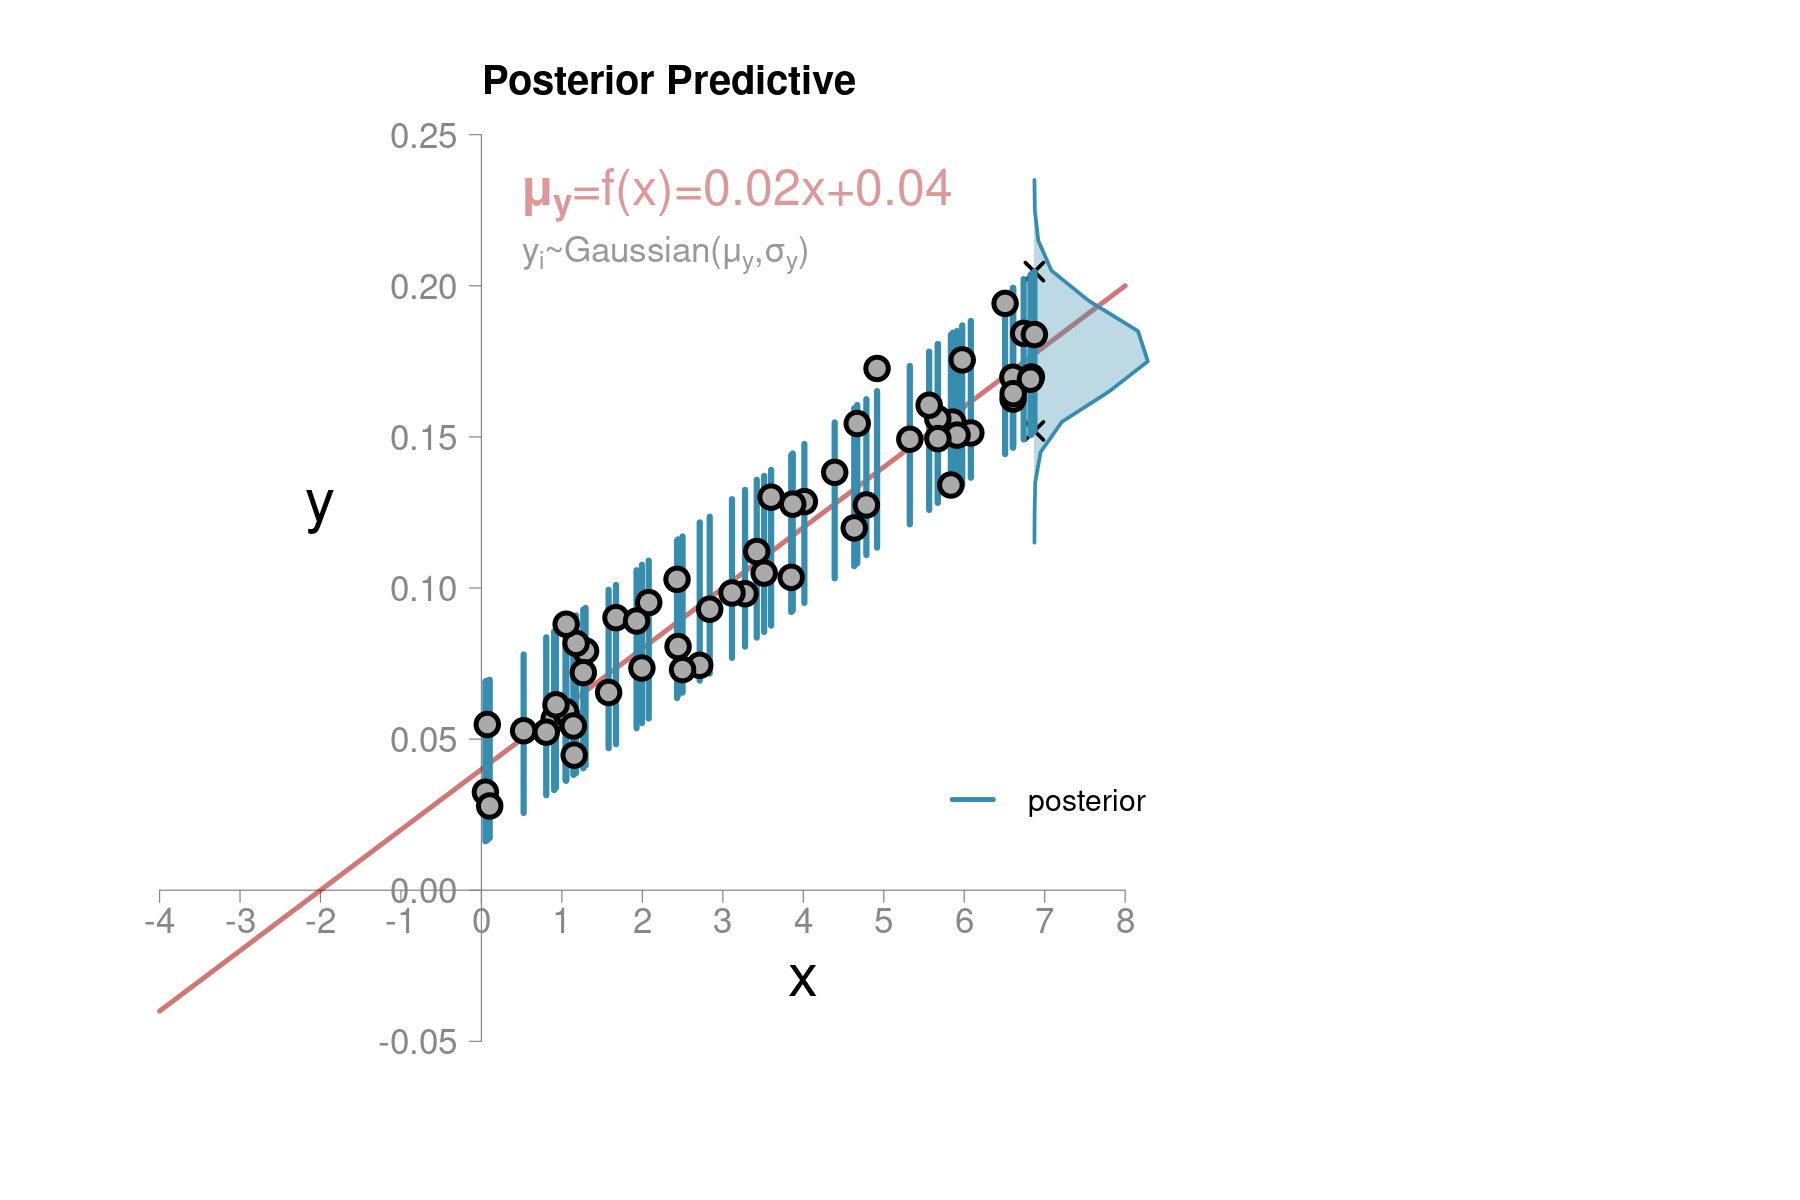

In [7]:
# POSTERIOR PREDICTIVE (pt.2, full)

# Canvas
options(repr.plot.width = 15, repr.plot.height = 10) # Plot size in notebook
plot(NULL,xlim=c(-4,15),ylim=c(-0.05,0.25),axes=F,ann=F)
axis(1,pos=0,cex.axis=1.75,at=-4:8,col='#888888',col.axis='#888888')
axis(2,pos=0,las=2,cex.axis=1.75,col='#888888',col.axis='#888888')
text(4,-0.03,'x',cex=3)
text(-2,0.125,'y',cex=3)

# True Model
lines(x,y,lwd=4,col='#aa000088')

# Add example observation
i <- which.max(x_simul)
# Extracting data from JAGS
ht_y_pred_post <- hist(nds$y_pred_post[,i],plot=F)
# Rescaling and positioning with respect to X
y_plot_post <- ht_y_pred_post$mids
y_dens_post <- ht_y_pred_post$density*0.05+x_simul[i]
# Plotting Posterior over Mu_Y[i]
polygon(x = c(head(y_dens_post,1),y_dens_post,tail(y_dens_post,1)),
        y=c(x_simul[i],y_plot_post,x_simul[i]),
        col=paste(col_post,'55',sep=''),border=NA)
lines(y_dens_post,y_plot_post,lwd=3,col=col_post)
# Find the values of Mu_Y[i] where the Posterior accumulates 2.5% and 97.5%...
y_range <- quantile(nds$y_pred_post[,i],prob=c(0.025,0.975))
# ...and plot them
points(rep(x_simul[i],2),y_range,lwd=3,cex=2,pch=4)

# Selected observations
index <- 1:length(x_simul)
for(i in index){
    # Find the values of Mu_Y[i] where the Posterior accumulates 2.5% and 97.5%...
    y_range <- quantile(nds$y_pred_post[,i],prob=c(0.025,0.975))
    # ...and plot them
    lines(rep(x_simul[i],2),y_range,lwd=5,col=col_post)
}

# Data
points(x_simul,y_simul,lwd=4,cex=2.5,pch=21,bg='#aaaaaa')

# Model labels
text(0.5,0.23,bquote(paste(bold('\u03BC'[y]),'=f(x)=',.(slope),'x+',.(intercept))),cex=2.5,adj=0,col='#aa000066')
text(0.5,0.21,bquote(paste('y'['i'],'~Gaussian(','\u03BC'[y],',\u03c3'[y],')')),cex=1.75,adj=0,col='#00000066')

# Legend
legend(5,0.03,yjust=0.5,
      legend=c('posterior'),
      col=c(col_post),
       seg.len=0.6,
       cex=1.5,
       x.intersp=0.5,
       y.intersp=0.5,
       box.lty='blank',
       bg=NA,
      lwd=4)

# Main title
mtext('Posterior Predictive',3,cex=2,adj=0.3,font=2)

#### Uncertainty over Slope and Intercept

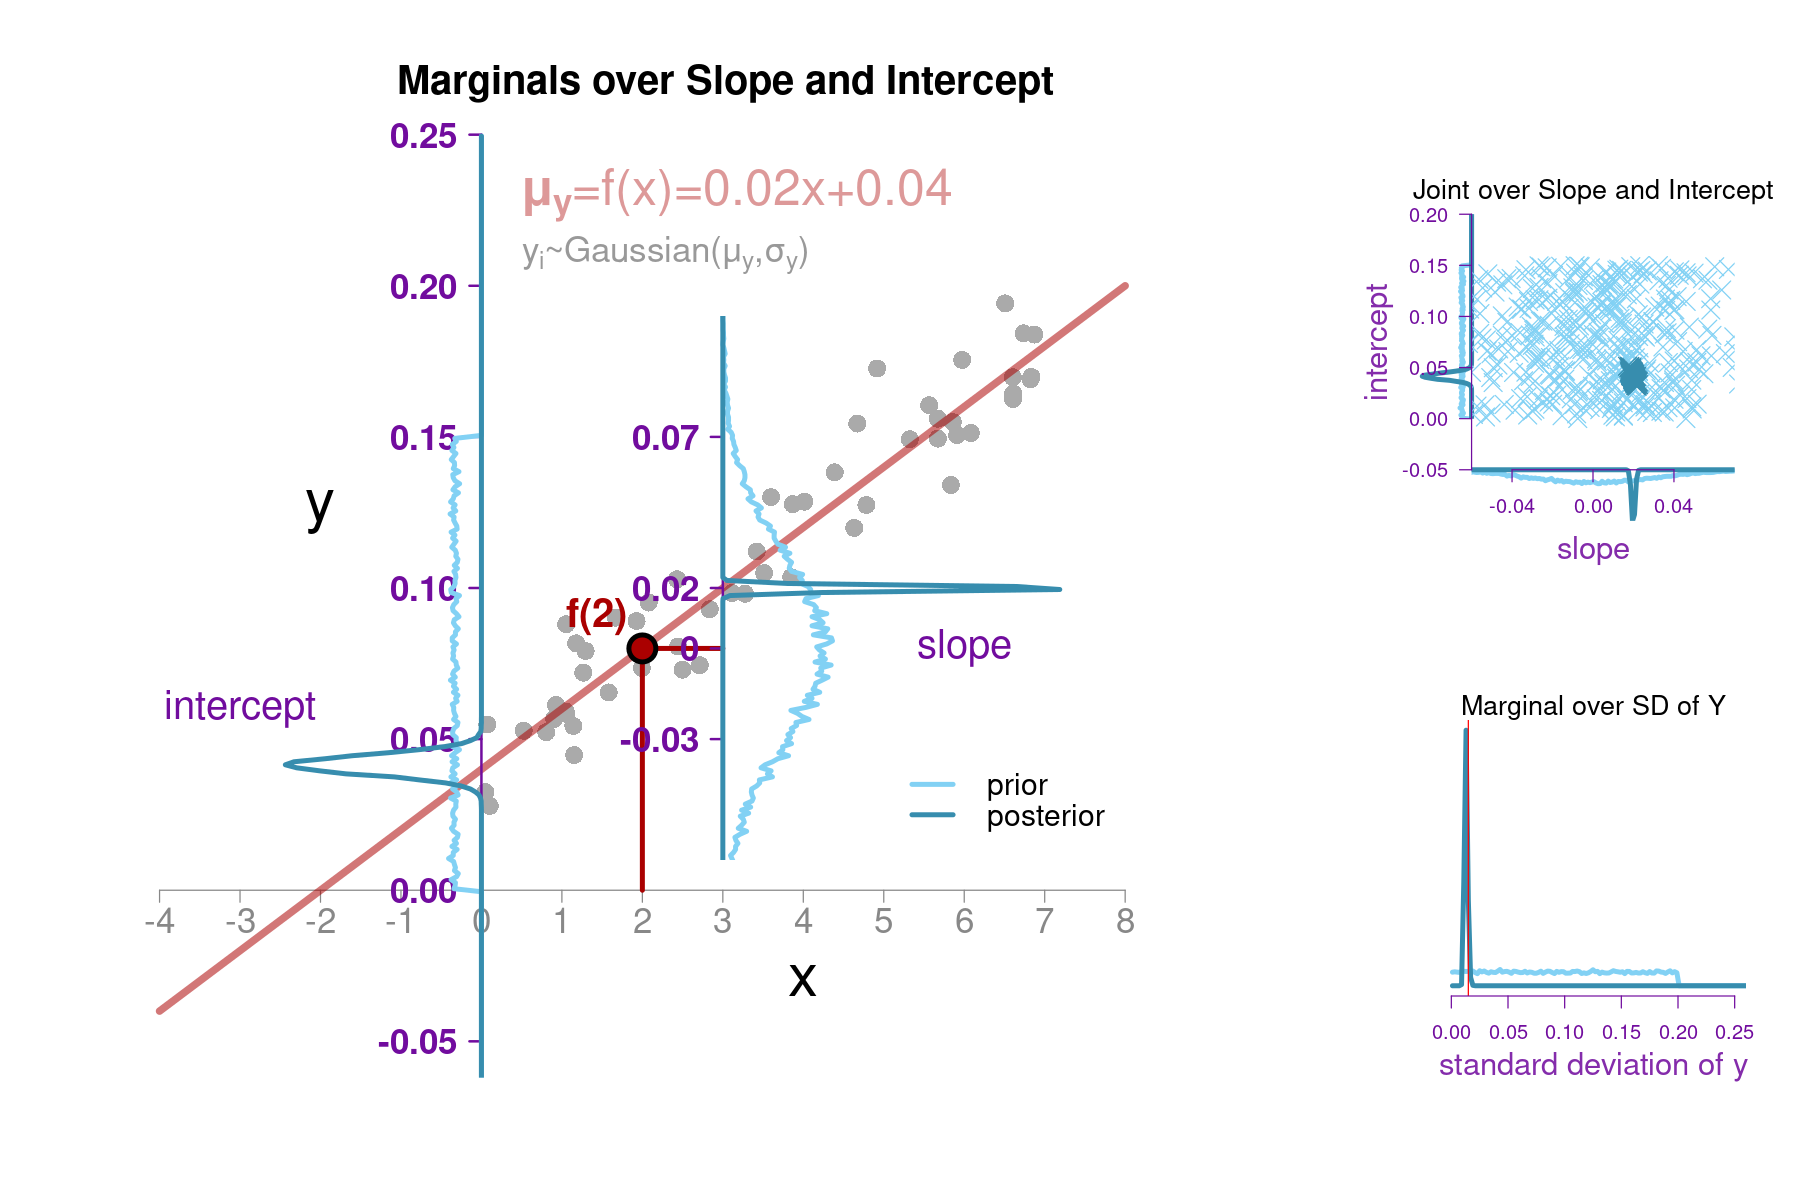

In [8]:
# Uncertainty over SLOPE, INTERCEPT, and DISPERSION of Y

# Information about uncertainty from JAGS
hist(nds$intercept_post,breaks=seq(-.25,.25,0.001),plot=F)->ht_int_post
hist(nds$intercept_prior,breaks=seq(-.25,.25,0.001),plot=F)->ht_int_prior
hist(nds$slope_post,breaks=seq(-30,30,0.001),plot=F)->ht_slp_post
hist(nds$slope_prior,breaks=seq(-30,30,0.001),plot=F)->ht_slp_prior

# Canvas
options(repr.plot.width = 15, repr.plot.height = 10) # Plot size in notebook
plot(NULL,xlim=c(-4,15),ylim=c(-0.05,0.25),axes=F,ann=F)
axis(1,pos=0,cex.axis=1.75,at=-4:8,col='#888888',col.axis='#888888')
text(4,-0.03,'x',cex=3)
text(-2,0.125,'y',cex=3)

# Data
points(x_simul,y_simul,pch=16,cex=2,col='#AAAAAA')
# True model
lines(x,y,lwd=6,col='#aa000088')

# Model equations
text(0.5,0.23,bquote(paste(bold('\u03BC'[y]),'=f(x)=',.(slope),'x+',.(intercept))),cex=2.5,adj=0,col='#aa000066')
text(0.5,0.21,bquote(paste('y'['i'],'~Gaussian(','\u03BC'[y],',\u03c3'[y],')')),cex=1.75,adj=0,col='#00000066')

# Plotting uncertainty over INTERCEPT
axis(2,pos=0,las=2,cex.axis=1.75,font=2,lwd=2,col=col_axis,col.axis=col_axis)
lines(ht_int_prior$density*-.05,ht_int_prior$mids,lwd=4,col=col_prior)
lines(ht_int_post$density*-.02,ht_int_post$mids,lwd=4,col=col_post)
text(-3,0.06,'intercept',cex=2,col=col_axis)

# Plotting uncertainty over SLOPE
segments(x0=c(2,2),x1=c(2,3),y0=c(0,f_x(2)),y1=rep(f_x(2),2),lwd=4,lty='solid',col='#aa0000')
points(2,f_x(2),pch=21,cex=3,bg='#aa0000',lwd=4)
text(2,f_x(2),'f(2)',adj=c(1.25,-.75),cex=2,font=2,col='#aa0000')
axis(2,at=c(f_x(2),seq(from=0.05,to=.15,by=.05)),
     labels=c(f_x(2),seq(from=0.05,to=.15,by=.05))-f_x(2),
     pos=3,las=2,cex.axis=1.75,font=2,lwd=2,col=col_axis,col.axis=col_axis)
clip(1,15,.01,.19)
lines(ht_slp_prior$density*.1+3,ht_slp_prior$mids+f_x(2),lwd=4,col=col_prior)
lines(ht_slp_post$density*.01+3,ht_slp_post$mids+f_x(2),lwd=4,col=col_post)
text(6,f_x(2),'slope',cex=2,col=col_axis)

# Legend
legend(4.5,0.03,yjust=0.5,
      legend=c('prior','posterior'),
      col=c(col_prior,col_post),
       seg.len=0.6,
       cex=1.5,
       x.intersp=0.5,
       y.intersp=0.5,
       box.lty='blank',
      lwd=4)

# Main title
mtext('Marginals over Slope and Intercept',3,cex=2,adj=0.3,font=2)

# Plotting joint uncertainty over SLOPE and INTERCEPT
par(plt=c(.8,.97,.6,.83),new=T)
plot(NULL,xlim=c(-0.07,0.07),ylim=c(-0.05,.20),ann=F,axes=F)
index <- sample(1:dim(nds$slope_post)[1],size=400)
clip(-1,1,0,.20)
lines(-.06-ht_int_prior$density*.0007,ht_int_prior$mids,col=col_prior,lwd=4)
lines(-.06-ht_int_post$density*.0002,ht_int_post$mids,col=col_post,lwd=4)
clip(-.06,.07,-.1,.20)
lines(ht_slp_prior$mids,-.05-ht_slp_prior$density*.001,col=col_prior,lwd=4)
lines(ht_slp_post$mids,-.05-ht_slp_post$density*.00012,col=col_post,lwd=4)
points(nds$slope_prior[index],nds$intercept_prior[index],pch=4,col=col_prior,cex=2)
points(nds$slope_post[index],nds$intercept_post[index],pch=4,col=col_post,cex=2)
axis(1,pos=-0.05,at=seq(-0.04,0.04,0.04),col=col_axis,col.axis=col_axis)
axis(2,pos=-0.06,las=1,at=seq(-.05,.20,0.05),col=col_axis,col.axis=col_axis)
mtext('intercept',2,cex=1.55,col=paste(col_axis,'dd',sep=''),line=2)
mtext('slope',1,cex=1.55,col=paste(col_axis,'dd',sep=''),line=2.5)
mtext('Joint over Slope and Intercept',3,cex=1.35)

# Plotting uncertainty over SD_Y
par(plt=c(.8,.97,.17,.4),new=T)
hist(nds$sd_y_post,breaks=seq(0,1,0.002),plot=F)->ht_sd_post
hist(nds$sd_y_prior,breaks=seq(0,1,0.002),plot=F)->ht_sd_prior
plot(NULL,xlim=c(0,0.25),ylim=c(0,max(max(ht_sd_prior$density),max(ht_sd_post$density))),ann=F,axes=F)
lines(ht_sd_prior$mids,ht_sd_prior$density*3,col=col_prior,lwd=4)
lines(ht_sd_post$mids,ht_sd_post$density,col=col_post,lwd=4)
abline(v = sd_y, col = "red")
axis(1,col=col_axis,col.axis=col_axis)
mtext('standard deviation of y',1,cex=1.55,col=paste(col_axis,'dd',sep=''),line=2.5)
mtext('Marginal over SD of Y',3,cex=1.35)

#### Uncertainty over $\mu_y$

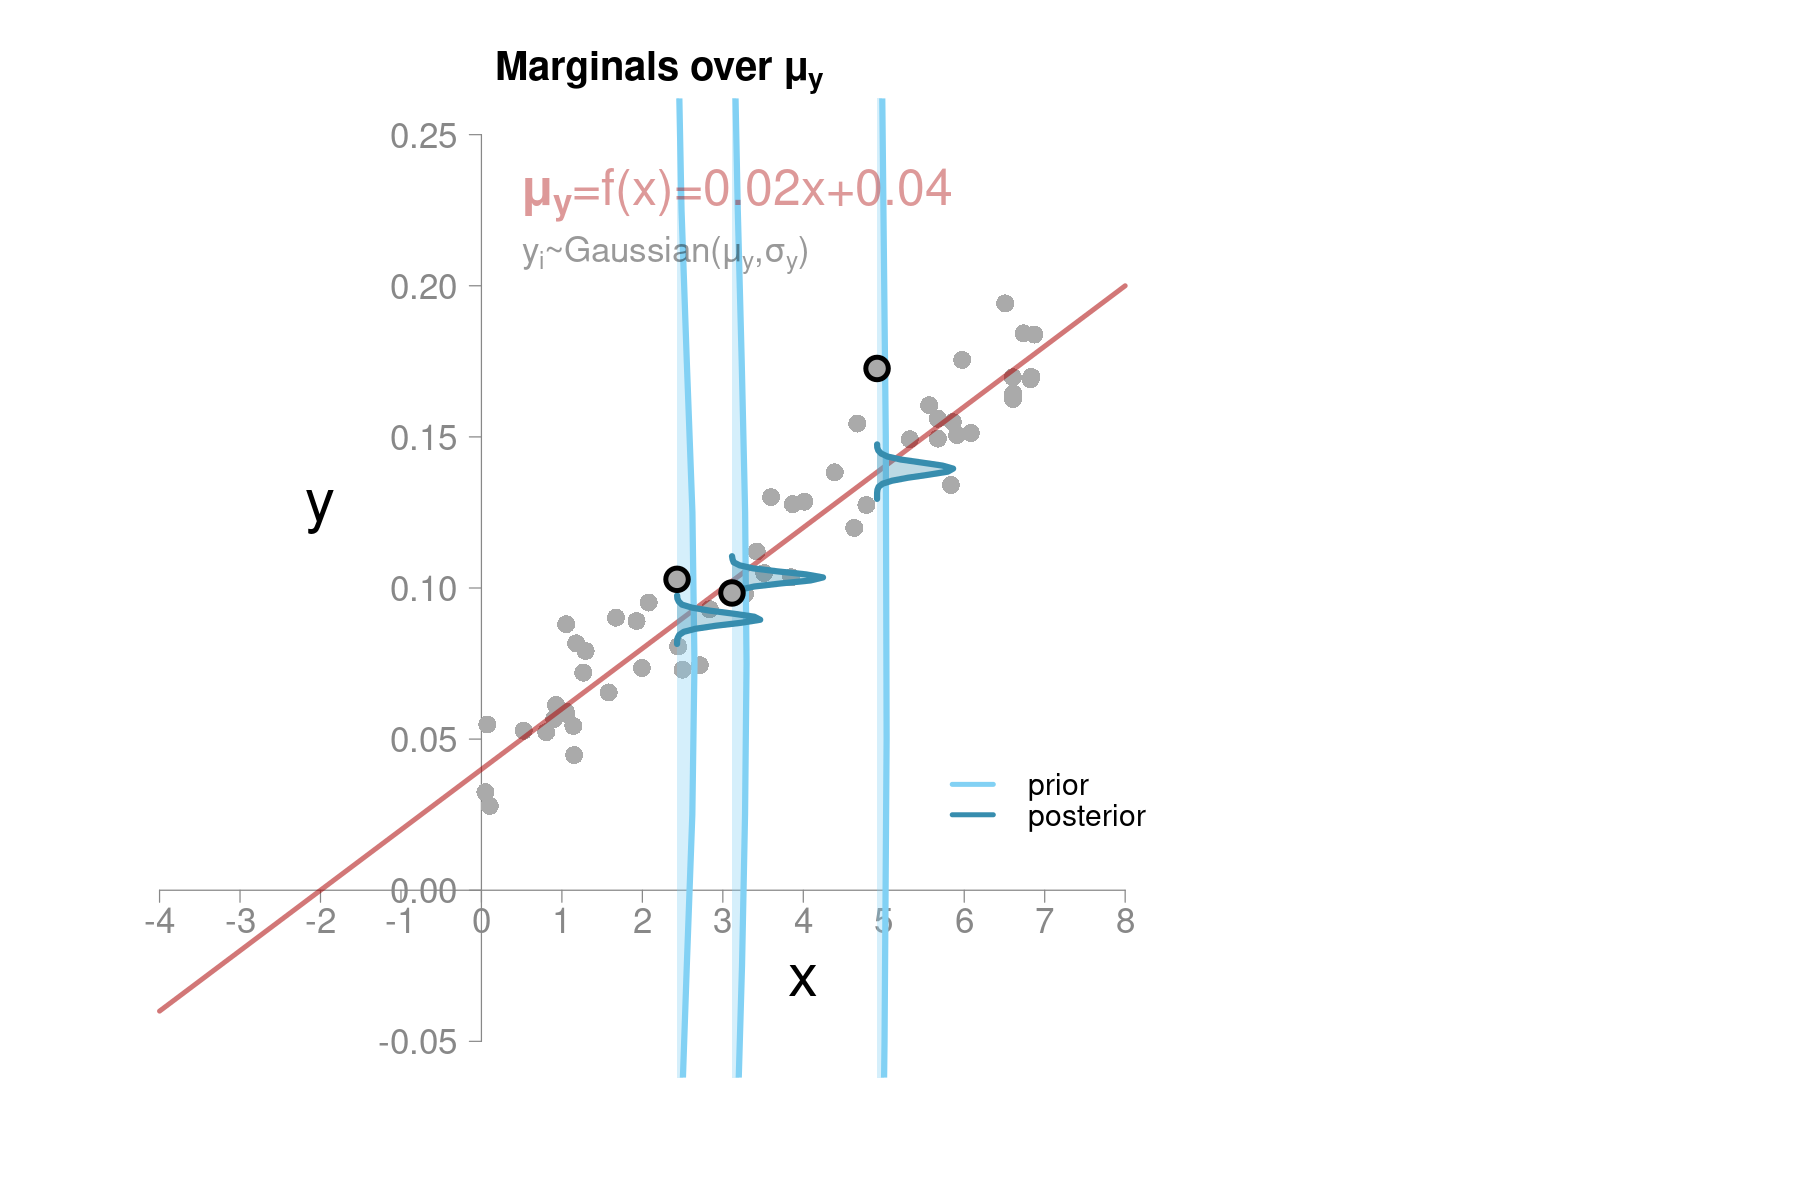

In [9]:
# Uncertainty over MU_Y (pt.1)

# Canvas
options(repr.plot.width = 15, repr.plot.height = 10) # Plot size in notebook
plot(NULL,xlim=c(-4,15),ylim=c(-0.05,0.25),axes=F,ann=F)
axis(1,pos=0,cex.axis=1.75,at=-4:8,col='#888888',col.axis='#888888')
axis(2,pos=0,las=2,cex.axis=1.75,col='#888888',col.axis='#888888')
text(4,-0.03,'x',cex=3)
text(-2,0.125,'y',cex=3)

# Data
points(x_simul,y_simul,pch=16,cex=2,col='#AAAAAA')
lines(x,y,lwd=4,col='#aa000088')

# Selected observations
index <- c(2,19,25)
for(i in index){
    # Extracting data from JAGS
    ht_mu_y_prior <- hist(nds$mu_y_prior[,i],plot=F)
    ht_mu_y_post <- hist(nds$mu_y_post[,i],plot=F)
    # Rescaling and positioning with respect to X
    y_plot_post <- ht_mu_y_post$mids
    y_dens_post <- ht_mu_y_post$density*0.005+x_simul[i]
    y_plot_prior <- ht_mu_y_prior$mids
    y_dens_prior <- ht_mu_y_prior$density*0.05+x_simul[i]
    # Plotting Prior over Mu_Y[i]
    polygon(x = c(head(y_dens_prior,1),y_dens_prior,tail(y_dens_prior,1)),
           y=c(x_simul[i],y_plot_prior,x_simul[i]),
           col=paste(col_prior,'55',sep=''),border=NA)
    lines(y_dens_prior,y_plot_prior,lwd=5,col=col_prior)
    # Plotting Posterior over Mu_Y[i]
    polygon(x = c(head(y_dens_post,1),y_dens_post,tail(y_dens_post,1)),
           y=c(x_simul[i],y_plot_post,x_simul[i]),
           col=paste(col_post,'55',sep=''),border=NA)
    lines(y_dens_post,y_plot_post,lwd=5,col=col_post)
}

# Add corresponding simulated observation
points(x_simul[index],y_simul[index],lwd=4,cex=2.5,bg='#aaaaaa',pch=21)

# Model equations
text(0.5,0.23,bquote(paste(bold('\u03BC'[y]),'=f(x)=',.(slope),'x+',.(intercept))),cex=2.5,adj=0,col='#aa000066')
text(0.5,0.21,bquote(paste('y'['i'],'~Gaussian(','\u03BC'[y],',\u03c3'[y],')')),cex=1.75,adj=0,col='#00000066')

# Legend
legend(5,0.03,yjust=0.5,
      legend=c('prior','posterior'),
      col=c(col_prior,col_post),
       seg.len=0.6,
       cex=1.5,
       x.intersp=0.5,
       y.intersp=0.5,
       box.lty='blank',
       bg=NA,
      lwd=4)

# Main title
mtext(bquote(bold(paste('Marginals over ','\u03bc'[y]))),3,cex=2,adj=0.3,font=2)

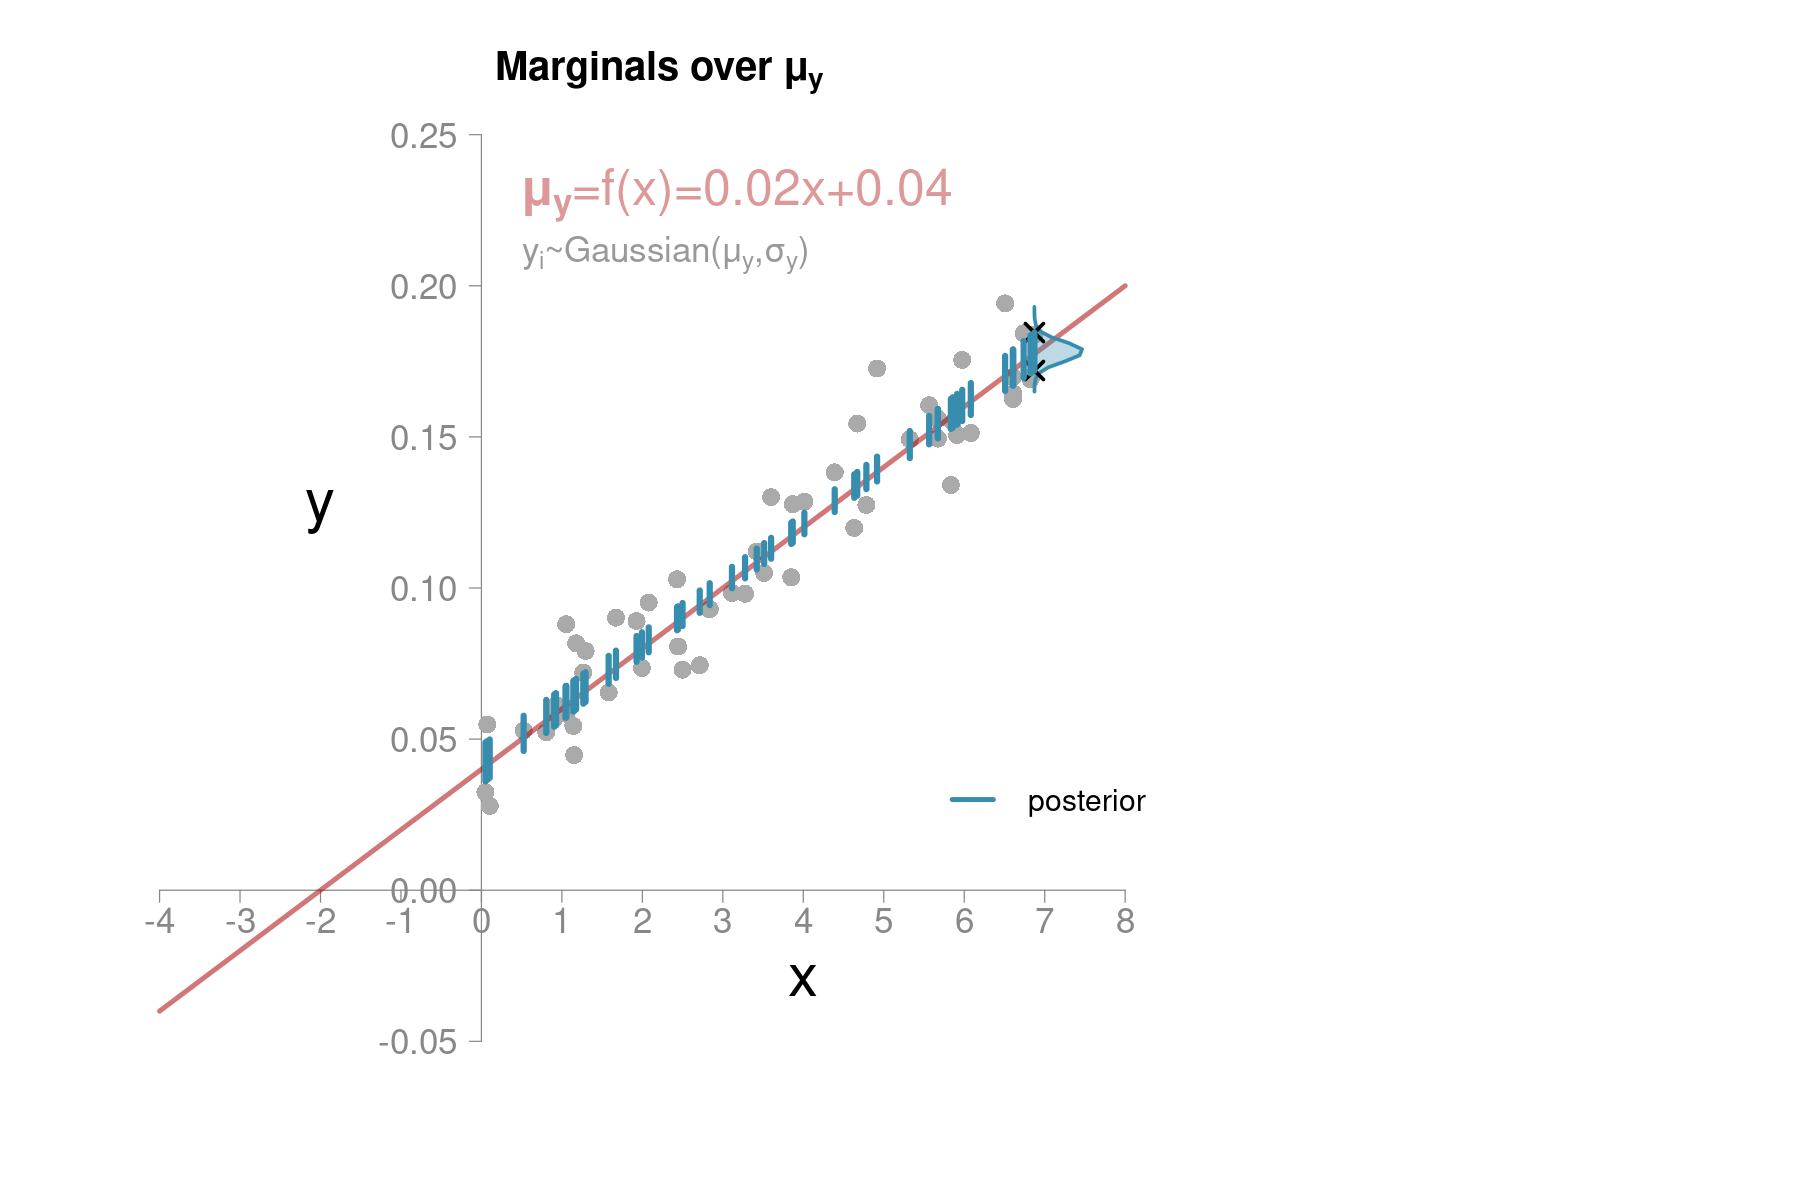

In [10]:
# Uncertainty over MU_Y (pt.2)

# Canvas
options(repr.plot.width = 15, repr.plot.height = 10) # Plot size in notebook
plot(NULL,xlim=c(-4,15),ylim=c(-0.05,0.25),axes=F,ann=F)
axis(1,pos=0,cex.axis=1.75,at=-4:8,col='#888888',col.axis='#888888')
axis(2,pos=0,las=2,cex.axis=1.75,col='#888888',col.axis='#888888')
text(4,-0.03,'x',cex=3)
text(-2,0.125,'y',cex=3)

# Data
points(x_simul,y_simul,pch=16,cex=2,col='#AAAAAA')
lines(x,y,lwd=4,col='#aa000088')

# Add example observation
i <- which.max(x_simul)
# Extracting data from JAGS
ht_mu_y_post <- hist(nds$mu_y_post[,i],plot=F)
# Rescaling and positioning with respect to X
y_plot_post <- ht_mu_y_post$mids
y_dens_post <- ht_mu_y_post$density*0.005+x_simul[i]
# Plotting Posterior over Mu_Y[i]
polygon(x = c(head(y_dens_post,1),y_dens_post,tail(y_dens_post,1)),
        y=c(x_simul[i],y_plot_post,x_simul[i]),
        col=paste(col_post,'55',sep=''),border=NA)
lines(y_dens_post,y_plot_post,lwd=3,col=col_post)
# Find the values of Mu_Y[i] where the Posterior accumulates 2.5% and 97.5%...
y_range <- quantile(nds$mu_y_post[,i],prob=c(0.025,0.975))
# ...and plot them
points(rep(x_simul[i],2),y_range,lwd=3,cex=2,pch=4)

# Selected observations
index <- c(2,19,25)
index <- 1:length(x_simul)
for(i in index){
    # Find the values of Mu_Y[i] where the Posterior accumulates 2.5% and 97.5%...
    y_range <- quantile(nds$mu_y_post[,i],prob=c(0.025,0.975))
    # ...and plot them
    lines(rep(x_simul[i],2),y_range,lwd=5,col=col_post)
}

# Model labels
text(0.5,0.23,bquote(paste(bold('\u03BC'[y]),'=f(x)=',.(slope),'x+',.(intercept))),cex=2.5,adj=0,col='#aa000066')
text(0.5,0.21,bquote(paste('y'['i'],'~Gaussian(','\u03BC'[y],',\u03c3'[y],')')),cex=1.75,adj=0,col='#00000066')

# Legend
legend(5,0.03,yjust=0.5,
      legend=c('posterior'),
      col=c(col_post),
       seg.len=0.6,
       cex=1.5,
       x.intersp=0.5,
       y.intersp=0.5,
       box.lty='blank',
       bg=NA,
      lwd=4)
# Main title
mtext(bquote(bold(paste('Marginals over ','\u03bc'[y]))),3,cex=2,adj=0.3,font=2)

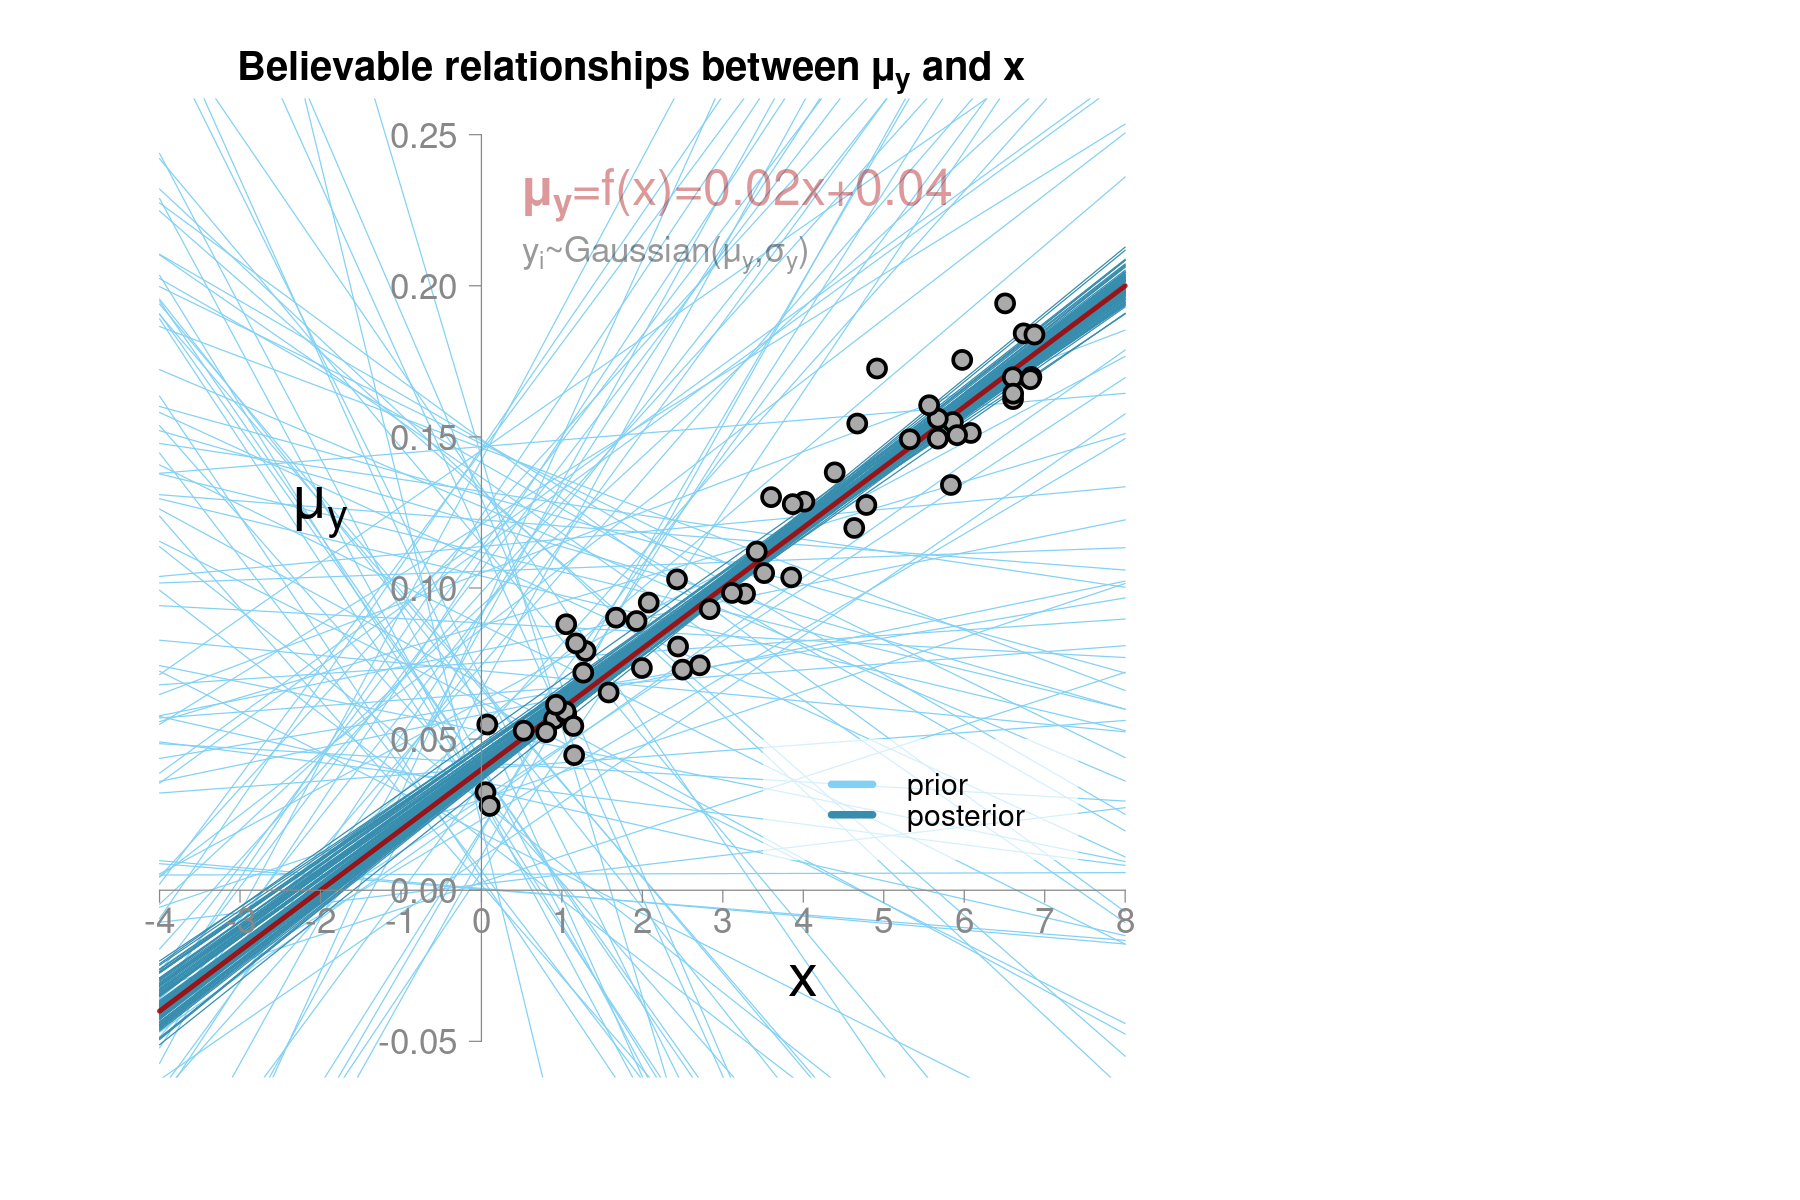

In [11]:
# Believable Lines

# Canvas (pt.1: base plot)
options(repr.plot.width = 15, repr.plot.height = 10) # Plot size in notebook
plot(NULL,xlim=c(-4,15),ylim=c(-0.05,0.25),axes=F,ann=F)

# Selected samples from JAGS
index <- sample(dim(nds$intercept_post)[1],size=100)
# Plotting prior lines
for(i in index){
    beta0_prior <- nds$intercept_prior[i]
    beta1_prior <- nds$slope_prior[i]
    y_believable_prior <- x*beta1_prior+beta0_prior
    lines(x,y_believable_prior,col=col_prior)
}
# Plotting posterior lines
for(i in index){
    beta0_post <- nds$intercept_post[i]
    beta1_post <- nds$slope_post[i]
    y_believable_post <- x*beta1_post+beta0_post
    lines(x,y_believable_post,col=col_post)
}

# True relationship
lines(x,y,lwd=4,col='#aa0000dd')
# Data
points(x_simul,y_simul,pch=21,lwd=3,cex=2,bg='#aaaaaa')

# Model equations
text(0.5,0.23,bquote(paste(bold('\u03BC'[y]),'=f(x)=',.(slope),'x+',.(intercept))),cex=2.5,adj=0,col='#aa000066')
text(0.5,0.21,bquote(paste('y'['i'],'~Gaussian(','\u03BC'[y],',\u03c3'[y],')')),cex=1.75,adj=0,col='#00000066')

# Legend
legend(3.5,0.03,yjust=0.5,
      legend=c('prior','posterior'),
      col=c(col_prior,col_post),
       seg.len=0.6,
       cex=1.5,
       x.intersp=0.5,
       y.intersp=0.5,
       box.lty='blank',
       bg='#ffffffaa',
       text.width=1.7,
      lwd=6)

# Main title
mtext(bquote(bold(paste('Believable relationships between ','\u03bc'[y],' and x',sep=''))),3,cex=2,adj=0.16,font=2)

# Canvas (pt.2: axes)
axis(1,pos=0,cex.axis=1.75,at=-4:8,col='#888888',col.axis='#888888')
axis(2,pos=0,las=2,cex.axis=1.75,col='#888888',col.axis='#888888')
text(4,-0.03,'x',cex=3)
text(-2,0.125,expression('\u03bc'[y]),cex=3)

### Ejercicios
El conjunto de observaciones `cycling.csv` contiene mediciones de `84 personas` sobre dos variables: el `número de minutos por día` que cada persona pedalea, y el `número de calorías por día` que cada persona consume.

El **diagrama de dispersión** de dichas observaciones sugiere que existe una relación lineal entre ellas, con cierto componente aleatorio.

Especifica el modelo en `JAGS` asumiendo una dispersión Gaussiana de las `calorías por día` respecto de esa relación lineal oculta, y responde las siguientes preguntas:

1. ¿Cuántas calorías se queman por cada minuto pedaleando?
2. ¿Cuántas calorías quema al día una persona que no pedalea?

In [14]:
rm(list=ls())

In [16]:
#cycling <- read.csv('data/cycling.csv')
cycling <- read.csv('~/Teaching/cycling.csv')
head(cycling)

,minutes_in_bike,calories_per_day
,<dbl>,<int>
1,52.5,2328
2,57.6,2415
3,50.5,2315
4,50.0,2303
5,57.0,2403
6,52.4,2317


In [17]:
dim(cycling)

[1] 84  2

In [18]:
nrow(cycling)

[1] 84

In [19]:
ncol(cycling)

[1] 2

In [20]:
summary(cycling)

 minutes_in_bike calories_per_day
 Min.   :36.40   Min.   :2135    
 1st Qu.:49.10   1st Qu.:2295    
 Median :52.55   Median :2342    
 Mean   :52.63   Mean   :2342    
 3rd Qu.:56.30   3rd Qu.:2392    
 Max.   :66.10   Max.   :2502    

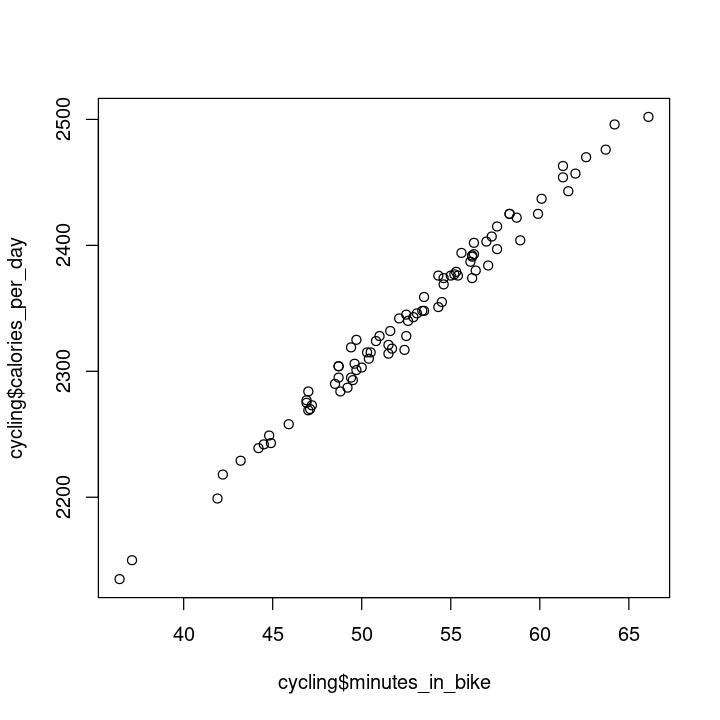

In [21]:
options(repr.plot.width = 6, repr.plot.height = 6) # Plot size in notebook
plot(cycling$minutes_in_bike,cycling$calories_per_day)

# Cuantas calorias se queman por minuto? (pendiente)
# Cuantas calorias se queman pedaleando cero minutos? (intercepto)
# Calorias por dia se distribuye normal
# Intercepto prior limites entre 1500 y 2000

In [23]:
# Model
write('model{

slope_post~dnorm(1,1000) # T(,0.01)
slope_prior~dnorm(1,1000) # T(,0.01)
intercept_post~dunif(1500,2250)
intercept_prior~dunif(1500,2250)
sd_y_post~dunif(0,0.2)
sd_y_prior~dunif(0,0.2)
tau_y_post <- 1/sd_y_post^2
tau_y_prior <- 1/sd_y_prior^2
for(i in 1:n_obs){
    mu_y_post[i] <- x_obs[i]*slope_post+intercept_post
    mu_y_prior[i] <- x_obs[i]*slope_prior+intercept_prior
    y_obs[i]~dnorm(mu_y_post[i],tau_y_post)
    y_pred_post[i]~dnorm(mu_y_post[i],tau_y_post)
    y_pred_prior[i]~dnorm(mu_y_prior[i],tau_y_prior)
}

}','cycling_linear_regression.bug')

# Observed
n_obs  <- nrow(cycling)
x_obs <- cycling$minutes_in_bike
y_obs <- cycling$calories_per_day

data_jags <- list('x_obs','y_obs','n_obs')

# Unobserved
unobs <- c('slope_post','slope_prior',
          'intercept_post','intercept_prior',
          'sd_y_post','sd_y_prior',
          'mu_y_post','mu_y_prior',
          'y_pred_post','y_pred_prior')

# Inference
library('R2jags')
bayes <- jags(data=data_jags,
             parameters.to.save=unobs,
             model.file='cycling_linear_regression.bug',
             n.iter=60000,
             n.burnin=6000,
             n.thin=3)
nds <- bayes$BUGSoutput$sims.list

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 84
   Unobserved stochastic nodes: 174
   Total graph size: 622

Initializing model



In [24]:
bayes$BUGSoutput$summary

,mean,sd,2.5%,25%,50%,75%,97.5%,Rhat,n.eff
deviance,150157.871,83.11862167,150000.840,150100.578,150156.272,150212.407,150327.411,1.002834,1100
intercept_post,1693.484,0.19392042,1693.112,1693.351,1693.483,1693.613,1693.872,1.002872,1100
intercept_prior,1875.430,216.70487682,1518.924,1687.989,1875.548,2063.447,2232.148,1.001037,30000
mu_y_post[1],2340.766,0.02182052,2340.724,2340.752,2340.766,2340.781,2340.809,1.000000,1
mu_y_post[2],2403.645,0.02843557,2403.589,2403.626,2403.645,2403.664,2403.701,1.000000,1
mu_y_post[3],2316.108,0.02315563,2316.063,2316.092,2316.108,2316.124,2316.153,1.000000,1
mu_y_post[4],2309.943,0.02383186,2309.897,2309.927,2309.943,2309.960,2309.990,1.000000,1
mu_y_post[5],2396.248,0.02707885,2396.194,2396.230,2396.248,2396.266,2396.301,1.000000,1
mu_y_post[6],2339.533,0.02183094,2339.491,2339.519,2339.534,2339.548,2339.576,1.000000,1
mu_y_post[7],2335.835,0.02189892,2335.792,2335.820,2335.835,2335.849,2335.877,1.000000,1


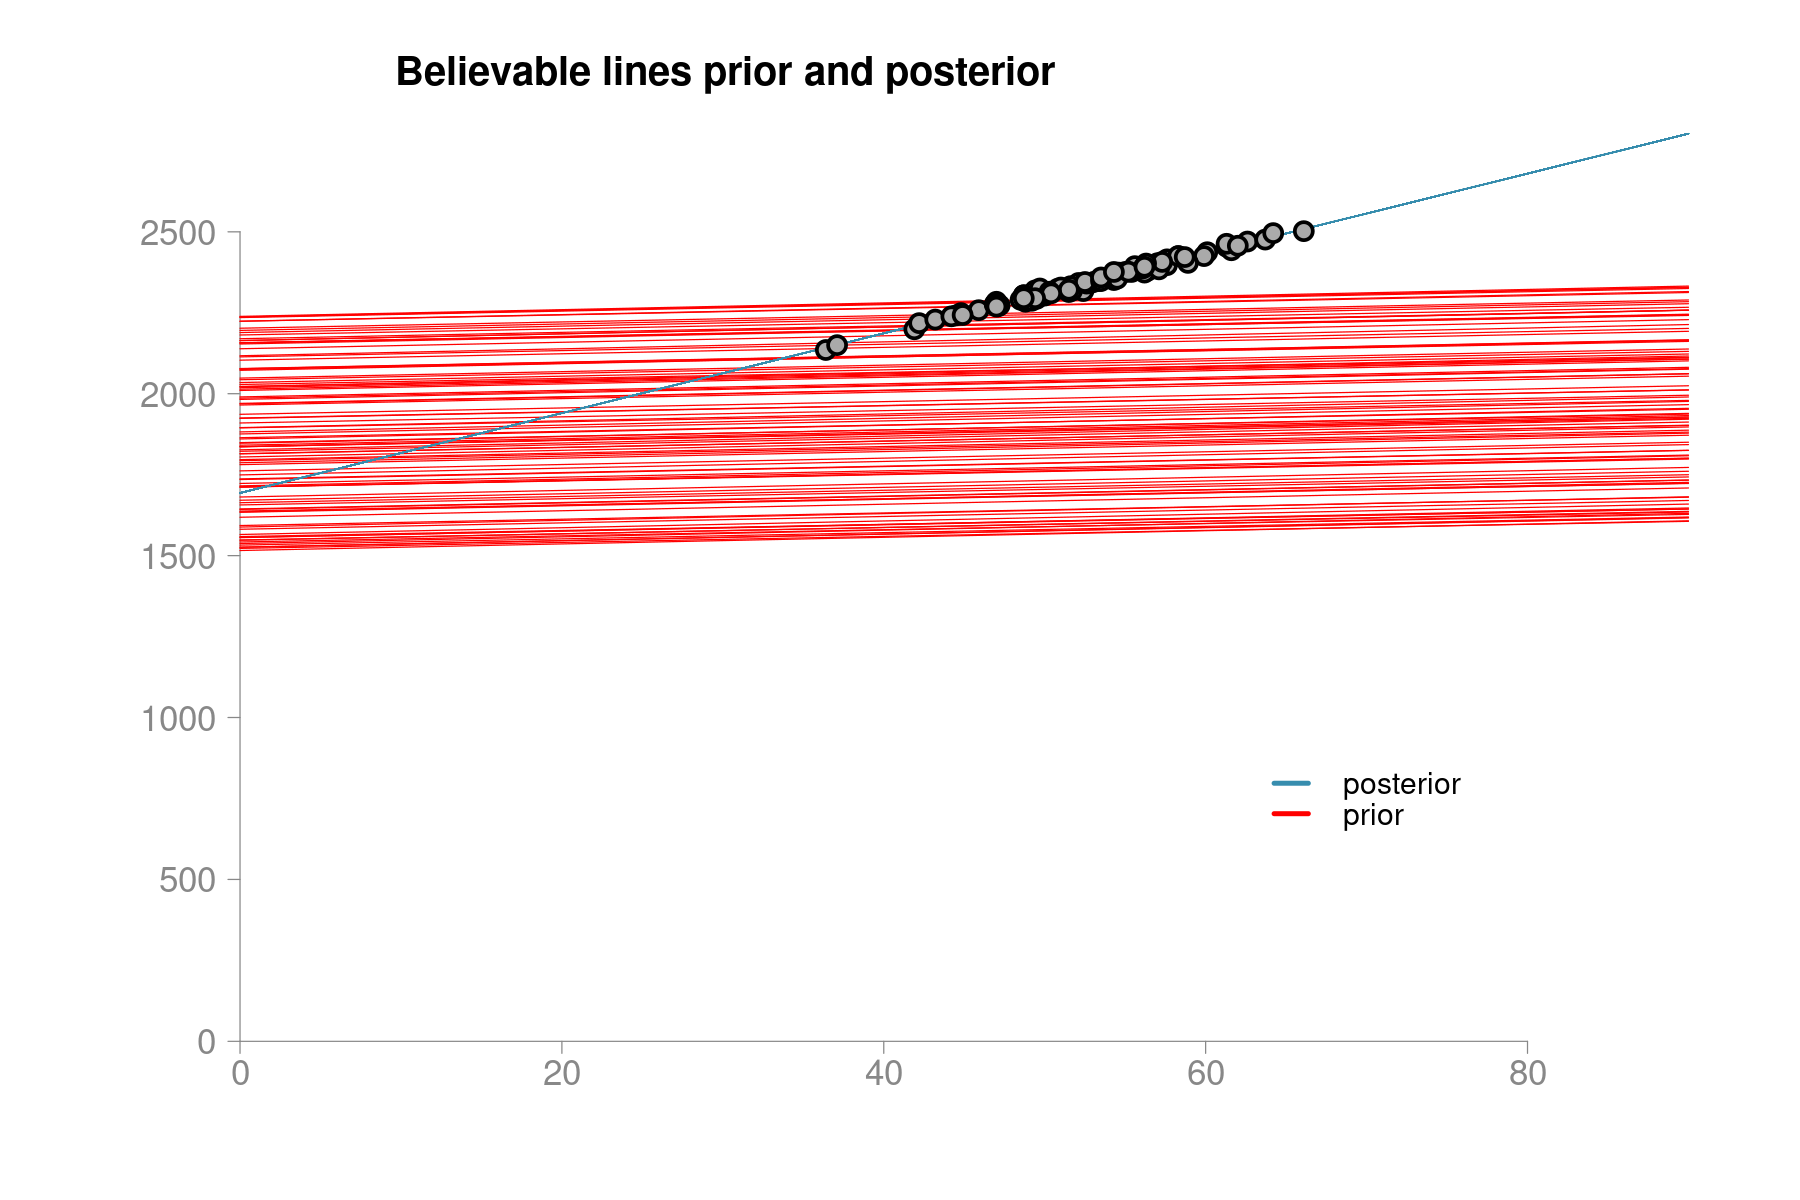

In [25]:
# Uncertainty over MU_Y (pt.1)

# Colors (to be used in all graphs)
col_prior <- 'red' 
col_post <- '#378dae'
col_axis <- '#710c9e'

# Canvas
options(repr.plot.width = 15, repr.plot.height = 10) # Plot size in notebook
plot(NULL,xlim=c(-5,90),ylim=c(0,2800),axes=F,ann=F)
axis(1,pos=0,cex.axis=1.75,col='#888888',col.axis='#888888')
axis(2,pos=0,las=2,cex.axis=1.75,col='#888888',col.axis='#888888')

# Selected samples from JAGS
index <- sample(dim(nds$intercept_post)[1],size=100)
x <- seq(0,90)
# Plotting prior lines
for(i in index){
    beta0_prior <- nds$intercept_prior[i]
    beta1_prior <- nds$slope_prior[i]
    y_believable_prior <- x*beta1_prior+beta0_prior
    lines(x,y_believable_prior,col=col_prior)
}
# Plotting posterior lines
for(i in index){
    beta0_post <- nds$intercept_post[i]
    beta1_post <- nds$slope_post[i]
    y_believable_post <- x*beta1_post+beta0_post
    lines(x,y_believable_post,col=col_post)
}

# Data
points(x_obs,y_obs,pch=21,lwd=3,cex=2,bg='#aaaaaa')

# Legend
legend(60,750,yjust=0.5,
      legend=c('posterior', 'prior'),
      col=c(col_post, col_prior),
       seg.len=0.5,
       cex=1.5,
       x.intersp=0.5,
       y.intersp=0.5,
       box.lty='blank',
       bg=NA,
      lwd=4)
# Main title
mtext(bquote(bold(paste('Believable lines prior and posterior'))),3,cex=2,adj=0.3,font=2)

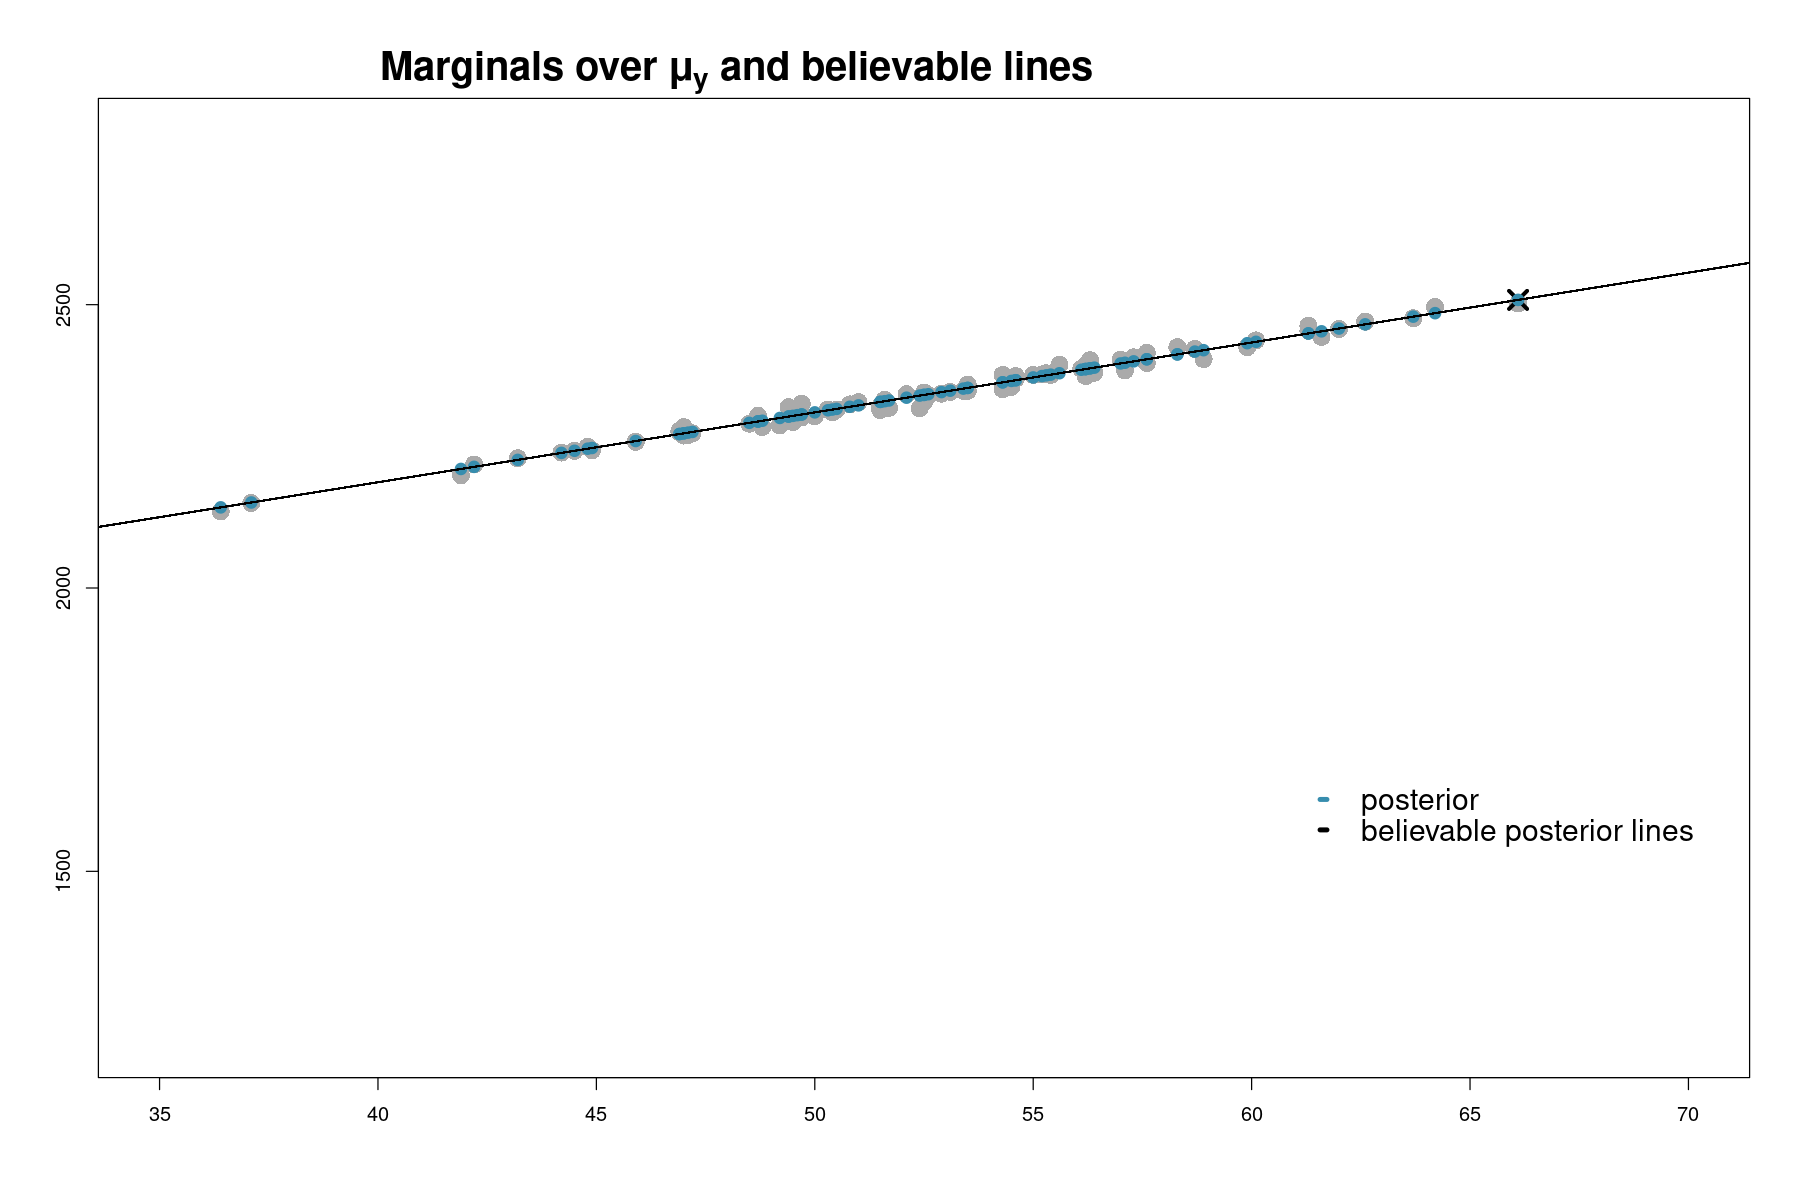

In [26]:
# Uncertainty over MU_Y (pt.2)

# Canvas
options(repr.plot.width = 15, repr.plot.height = 10) # Plot size in notebook
plot(NULL,xlim=c(35,70),ylim=c(1200,2800),axes=T,ann=F)
# axis(1,pos=0,cex.axis=1.75,col='#888888',col.axis='#888888')
# axis(2,pos=0,las=2,cex.axis=1.75,col='#888888',col.axis='#888888')

# Data
points(x_obs,y_obs,pch=16,cex=2,col='#AAAAAA')

# Add example observation
i <- which.max(x_obs)
# Extracting data from JAGS
ht_mu_y_post <- hist(nds$mu_y_post[,i],plot=F)
# Rescaling and positioning with respect to X
y_plot_post <- ht_mu_y_post$mids
y_dens_post <- ht_mu_y_post$density*0.005+x_obs[i]
# Plotting Posterior over Mu_Y[i]
polygon(x = c(head(y_dens_post,1),y_dens_post,tail(y_dens_post,1)),
        y=c(x_obs[i],y_plot_post,x_obs[i]),
        col=paste(col_post,'55',sep=''),border=NA)
lines(y_dens_post,y_plot_post,lwd=3,col=col_post)
# Find the values of Mu_Y[i] where the Posterior accumulates 2.5% and 97.5%...
y_range <- quantile(nds$mu_y_post[,i],prob=c(0.025,0.975))
# ...and plot them
points(rep(x_obs[i],2),y_range,lwd=3,cex=2,pch=4)

# Selected observations

index <- 1:length(x_obs)
for(i in index){
    # Find the values of Mu_Y[i] where the Posterior accumulates 2.5% and 97.5%...
    y_range <- quantile(nds$mu_y_post[,i],prob=c(0.025,0.975))
    # ...and plot them
    lines(rep(x_obs[i],2),y_range,lwd=10,col=col_post)
}

# Plotting posterior lines
for(i in index){
    beta0_post <- nds$intercept_post[i]
    beta1_post <- nds$slope_post[i]
    y_believable_post <- x*beta1_post+beta0_post
    lines(x,y_believable_post,col="#000000")
}


# Legend
legend(60,1600,yjust=0.5,
      legend=c('posterior', 'believable posterior lines'),
      col=c(col_post, 'black'),
       seg.len=0.1,
       cex=1.5,
       x.intersp=0.5,
       y.intersp=0.5,
       box.lty='blank',
       bg=NA,
      lwd=4)
# Main title
mtext(bquote(bold(paste('Marginals over ','\u03bc'[y], ' and believable lines'))),3,cex=2,adj=0.3,font=2)

In [28]:
bayes_summary <- bayes$BUGSoutput$summary

intercept_post_summary <- bayes_summary['intercept_post',]
slope_post_summary  <- bayes_summary['slope_post',]

intercepto <- paste(
    "Media del intercepto post:", intercept_post_summary["mean"], ".",
    "SD del intercepto post:", intercept_post_summary["sd"]
)

pendiente <- paste(
    "Media de la pendiente post:", slope_post_summary["mean"],
    "SD de la pendiente post:", intercept_post_summary["sd"]
)

respuestas <- data.frame(
    media = c(intercept_post_summary["mean"], slope_post_summary["mean"]),
    sd = c(intercept_post_summary["sd"], slope_post_summary["sd"])
)
row.names(respuestas)  <- c("intercepto", "pendiente")

intercepto
pendiente
respuestas

[1] "Media del intercepto post: 1693.48436169796 . SD del intercepto post: 0.193920418661841"

[1] "Media de la pendiente post: 12.3291820015921 SD de la pendiente post: 0.193920418661841"

,media,sd
,<dbl>,<dbl>
intercepto,1693.48436,0.193920419
pendiente,12.32918,0.003661939


# Respuestas

1. ¿Cuántas calorías se queman por cada minuto pedaleando?
    * Tal como indica la media de la pendiente posterior, con base en los datos observados y los resultados del modelo, se quemarían en promedio `12.32` calorías por minuto pedaleado.
2. ¿Cuántas calorías quema al día una persona que no pedalea?
    * Si una persona no pedalea o pedalea 0 minutos en un día, también con base en los datos observados y en los generados por el modelo, se quemarían en promedio `1693.48` calorías.

#### Evaluación:

Aunque los valores más probables de pendiente e intercepto parecen razonables, y la líneas creíbles posteriores también, creo que hay razones para dudar de la pertinencia del modelo (y por lo tanto de la interpretación de todos sus parámetros) porque parece no explicar una característica importante de las observaciones: cuando graficamos la **posterior predictiva** la mayoría de las observaciones se ubican _fuera_ del área de mayor densidad predictiva posterior.

¿A qué se debe este resultado y cómo puede corregirse?

Calif.: 2/3

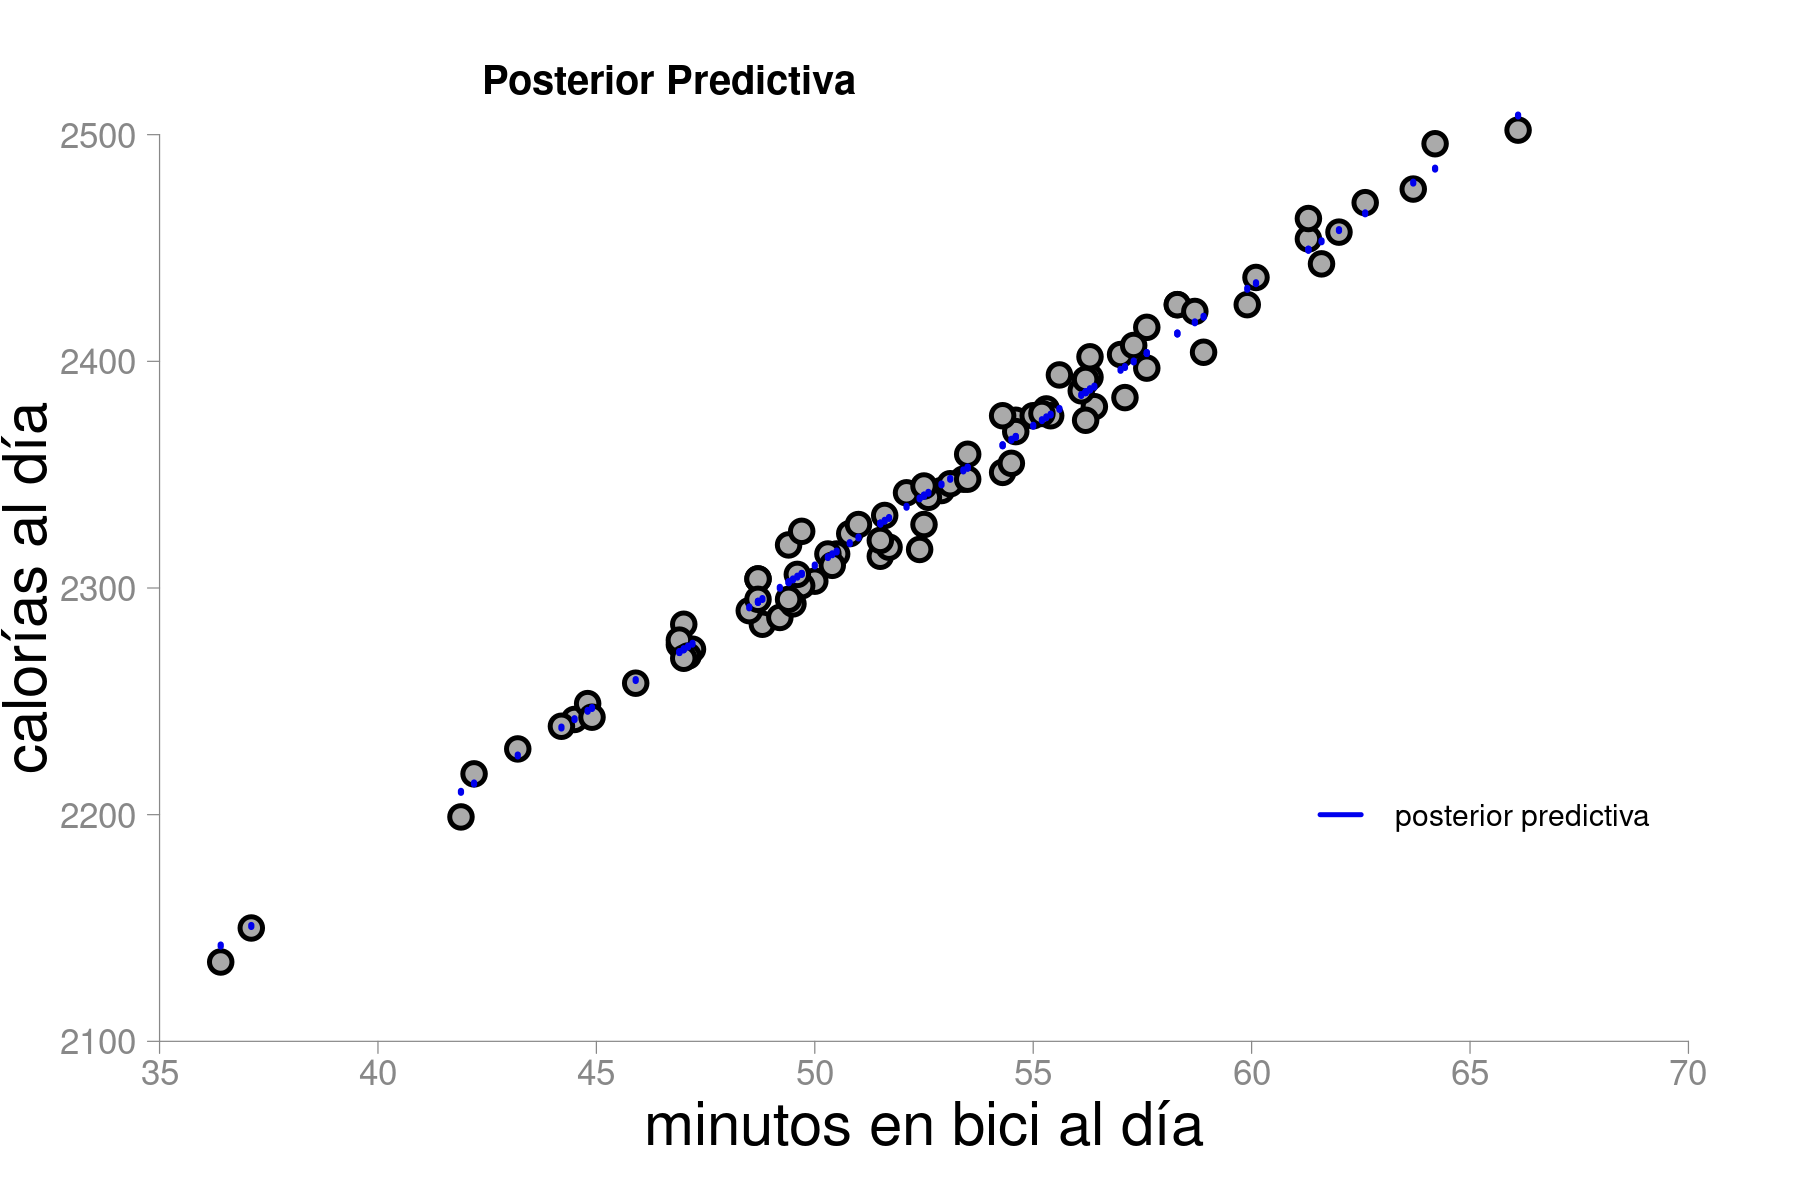

In [49]:
# POSTERIOR PREDICTIVE

# Canvas
options(repr.plot.width = 15, repr.plot.height = 10) # Plot size in notebook
plot(NULL,xlim=c(35,70),ylim=c(2100,2500),axes=F,ann=F)
axis(1,pos=2100,cex.axis=1.75,col='#888888',col.axis='#888888')
axis(2,pos=35,las=2,cex.axis=1.75,col='#888888',col.axis='#888888')
mtext('minutos en bici al día',1,line=2,cex=3)
mtext('calorías al día',2,line=2,cex=3)

# Data
points(x_obs,y_obs,lwd=4,cex=2.5,pch=21,bg='#aaaaaa')

# Selected observations
index <- 1:length(x_obs)
for(i in index){
    # Find the values of Mu_Y[i] where the Posterior accumulates 2.5% and 97.5%...
    y_range <- quantile(nds$y_pred_post[,i],prob=c(0.025,0.975))
    # ...and plot them
    lines(rep(x_obs[i],2),y_range,lwd=5,col='#0000ee')
}

# Legend
legend(60,2200,yjust=0.5,
      legend=c('posterior predictiva'),
      col=c('#0000ee'),
       seg.len=0.6,
       cex=1.5,
       x.intersp=0.5,
       y.intersp=0.5,
       box.lty='blank',
       bg=NA,
      lwd=4)

# Main title
mtext('Posterior Predictiva',3,cex=2,adj=0.3,font=2)